In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model.utils import plot_grad_flow
from model.dkf import *
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from 3 super-hubs
y_3 = np.sin(np.arange(378)).reshape(-1,1)
y_3 = y_3[:, 0].reshape(-1,1)
y_3.shape

(378, 1)

In [3]:
# Split data between train and test 
T = 264 # train data
T_pred = y_3.shape[0] - T # prediction horizon
T_val = T_test = T_pred//2

y = y_3[:,0].reshape(-1,1)
y_train = y[:T].reshape(-1,1)
y_val = y[T:T+T_val].reshape(-1,1)
y_test = y[T+T_val:T+T_val+T_test].reshape(-1,1)

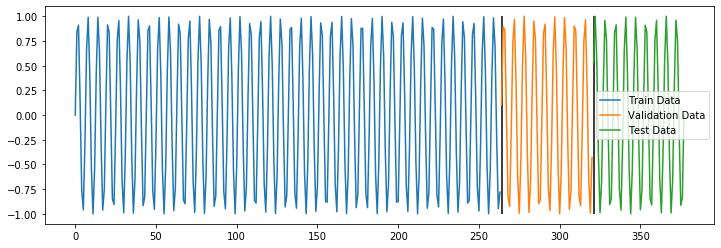

In [4]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(T), y_train, label="Train Data")
plt.vlines(T, ymin=y.min(),ymax=y.max())
plt.vlines(T+T_val, ymin=y.min(),ymax=y.max())
plt.plot(np.arange(T, T + T_val), y_val, label="Validation Data")
plt.plot(np.arange(T + T_val, T + T_val + T_test), y_test, label="Test Data")
plt.legend()
plt.show()

In [5]:
# Standardize data
scaler = StandardScaler()
y_train_sc = scaler.fit_transform(y_train.reshape(-1,y_3.shape[1]))
y_val_sc = scaler.transform(y_val.reshape(-1,y_3.shape[1]))
y_test_sc = scaler.transform(y_test.reshape(-1,y_3.shape[1]))
y_sc = scaler.transform(y.reshape(-1,y_3.shape[1]))

# Transform to torch.tensor and reshape
y_train_sc = torch.from_numpy(y_train_sc).reshape(1, T, y_train_sc.shape[1])
y_val_sc = torch.from_numpy(y_val_sc).reshape(1, T_val, y_val_sc.shape[1])
y_test_sc = torch.from_numpy(y_test_sc).reshape(1, T_test, y_test_sc.shape[1])
y_sc = torch.from_numpy(y_sc).reshape(1, y_sc.shape[0], y_sc.shape[1])

## Non-Reversed Recognition Network

In [6]:
use_cuda = False
dmm = DMM(use_cuda=use_cuda, annealing_factor=0.01, input_dim=1, z_dim=50, rnn_dim=100, emission_dim=50, transition_dim=50)
svi = SVI(dmm.model, dmm.guide, optim=pyro.optim.Adam({"lr":0.001}), loss=Trace_ELBO(num_particles=10))

In [7]:
if use_cuda:
    y_sc = y_sc.float().cuda()
    y_train_sc = y_train_sc.float().cuda()
    y_val_sc = y_val_sc.float().cuda()
    y_test_sc = y_test_sc.float().cuda()
y_sc = y_sc.float()
y_train_sc = y_train_sc.float()
y_val_sc = y_val_sc.float()
y_test_sc = y_test_sc.float()

Epoch: 1, Loss: 5.379, Val Loss: 5.276, sigma: Parameter containing:
tensor([0.3010], requires_grad=True)

 SUPER-HUB  1

==== Train Results ====
R2: 0.005, MAE: 0.635, RMSE: 0.705
==== Validation Results ====
R2: 0.002, MAE: 0.629, RMSE: 0.703
==== Test Results ====
R2: 0.002, MAE: 0.631, RMSE: 0.704


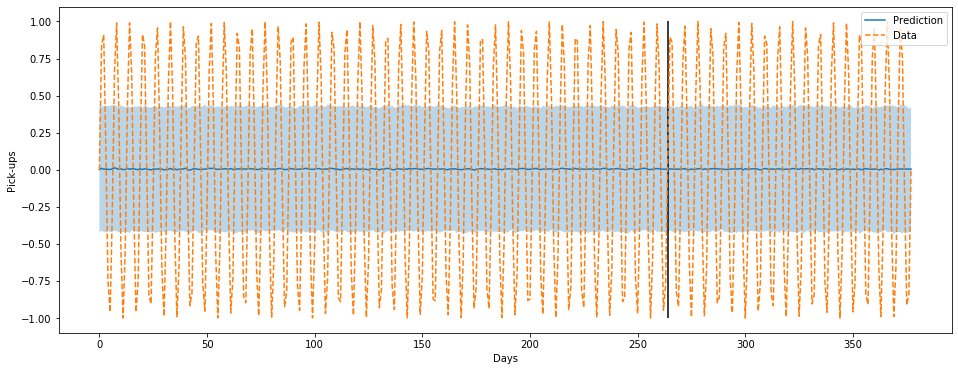

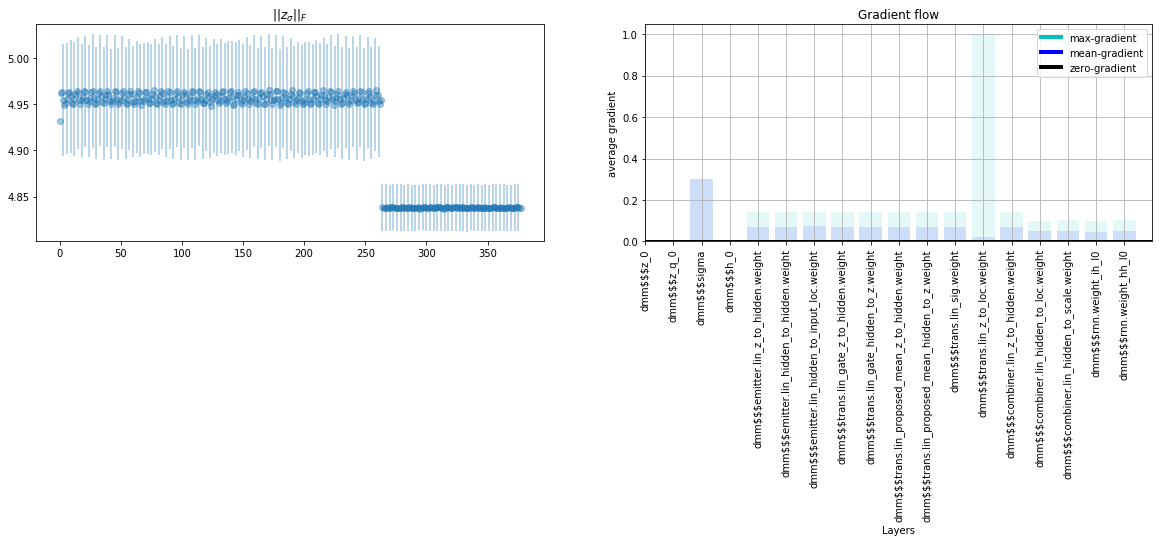

Epoch: 2, Loss: 5.309, Val Loss: 5.211, sigma: Parameter containing:
tensor([0.3020], requires_grad=True)
Epoch: 3, Loss: 5.238, Val Loss: 5.165, sigma: Parameter containing:
tensor([0.3030], requires_grad=True)
Epoch: 4, Loss: 5.204, Val Loss: 5.119, sigma: Parameter containing:
tensor([0.3040], requires_grad=True)
Epoch: 5, Loss: 5.171, Val Loss: 5.100, sigma: Parameter containing:
tensor([0.3050], requires_grad=True)
Epoch: 6, Loss: 5.140, Val Loss: 5.034, sigma: Parameter containing:
tensor([0.3060], requires_grad=True)
Epoch: 7, Loss: 5.074, Val Loss: 4.936, sigma: Parameter containing:
tensor([0.3070], requires_grad=True)
Epoch: 8, Loss: 5.024, Val Loss: 4.931, sigma: Parameter containing:
tensor([0.3080], requires_grad=True)
Epoch: 9, Loss: 4.974, Val Loss: 4.833, sigma: Parameter containing:
tensor([0.3090], requires_grad=True)
Epoch: 10, Loss: 4.889, Val Loss: 4.808, sigma: Parameter containing:
tensor([0.3100], requires_grad=True)

 SUPER-HUB  1

==== Train Results ====
R2: 0

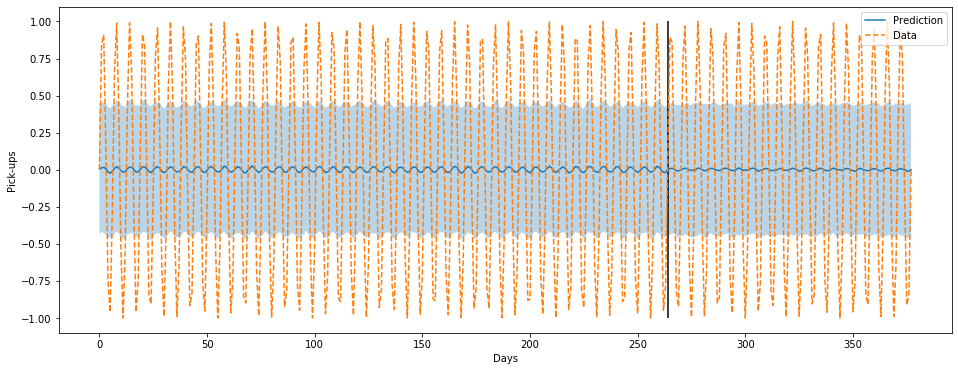

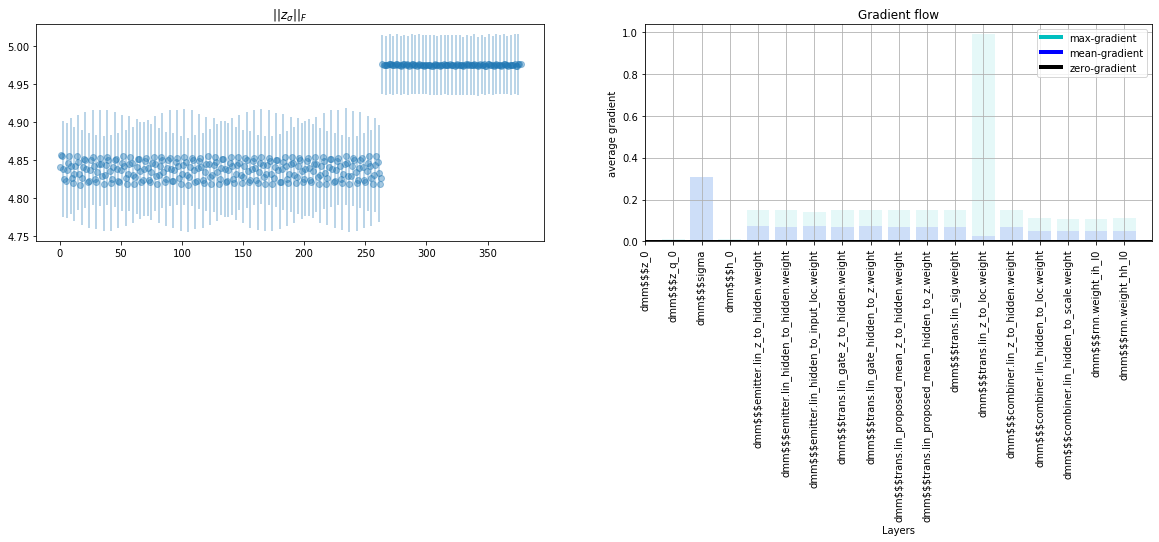

Epoch: 11, Loss: 4.820, Val Loss: 4.783, sigma: Parameter containing:
tensor([0.3109], requires_grad=True)
Epoch: 12, Loss: 4.743, Val Loss: 4.645, sigma: Parameter containing:
tensor([0.3119], requires_grad=True)
Epoch: 13, Loss: 4.655, Val Loss: 4.505, sigma: Parameter containing:
tensor([0.3129], requires_grad=True)
Epoch: 14, Loss: 4.582, Val Loss: 4.417, sigma: Parameter containing:
tensor([0.3139], requires_grad=True)
Epoch: 15, Loss: 4.429, Val Loss: 4.350, sigma: Parameter containing:
tensor([0.3148], requires_grad=True)
Epoch: 16, Loss: 4.316, Val Loss: 3.942, sigma: Parameter containing:
tensor([0.3158], requires_grad=True)
Epoch: 17, Loss: 4.130, Val Loss: 3.859, sigma: Parameter containing:
tensor([0.3167], requires_grad=True)
Epoch: 18, Loss: 3.943, Val Loss: 3.596, sigma: Parameter containing:
tensor([0.3177], requires_grad=True)
Epoch: 19, Loss: 3.586, Val Loss: 3.245, sigma: Parameter containing:
tensor([0.3186], requires_grad=True)
Epoch: 20, Loss: 3.295, Val Loss: 2.8

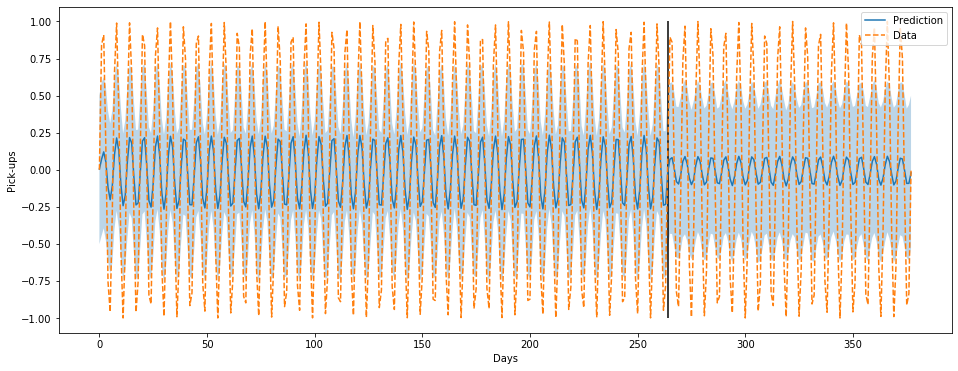

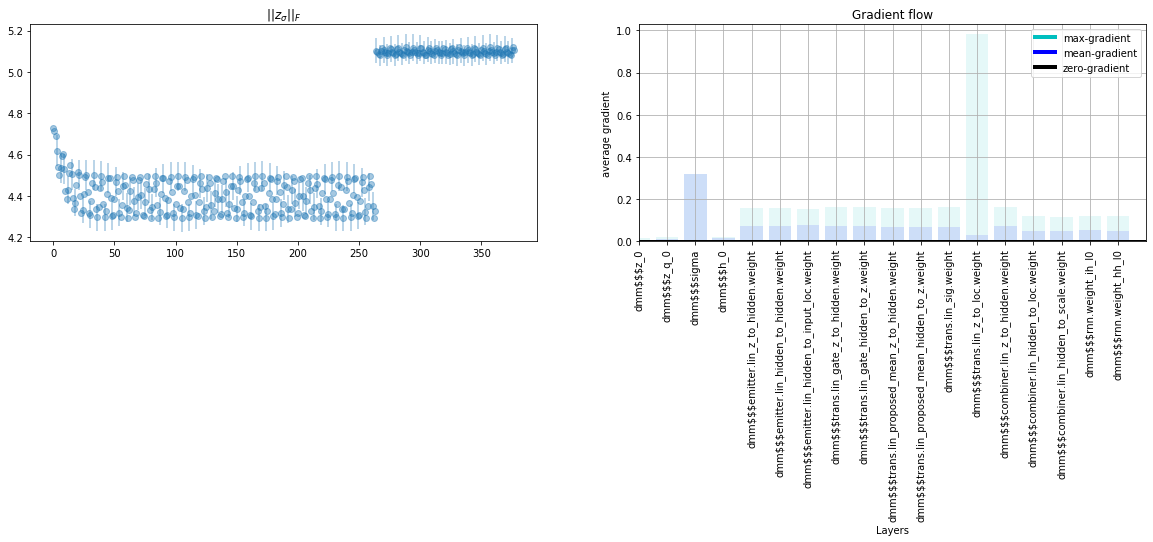

Epoch: 21, Loss: 2.770, Val Loss: 2.291, sigma: Parameter containing:
tensor([0.3204], requires_grad=True)
Epoch: 22, Loss: 2.135, Val Loss: 1.573, sigma: Parameter containing:
tensor([0.3212], requires_grad=True)
Epoch: 23, Loss: 1.369, Val Loss: 0.881, sigma: Parameter containing:
tensor([0.3220], requires_grad=True)
Epoch: 24, Loss: 0.639, Val Loss: 0.660, sigma: Parameter containing:
tensor([0.3227], requires_grad=True)
Epoch: 25, Loss: 0.594, Val Loss: 0.623, sigma: Parameter containing:
tensor([0.3234], requires_grad=True)
Epoch: 26, Loss: 0.305, Val Loss: 0.607, sigma: Parameter containing:
tensor([0.3240], requires_grad=True)
Epoch: 27, Loss: 0.339, Val Loss: 0.483, sigma: Parameter containing:
tensor([0.3245], requires_grad=True)
Epoch: 28, Loss: 0.352, Val Loss: 0.465, sigma: Parameter containing:
tensor([0.3250], requires_grad=True)
Epoch: 29, Loss: 0.336, Val Loss: 0.561, sigma: Parameter containing:
tensor([0.3254], requires_grad=True)
Epoch: 30, Loss: 0.333, Val Loss: 0.5

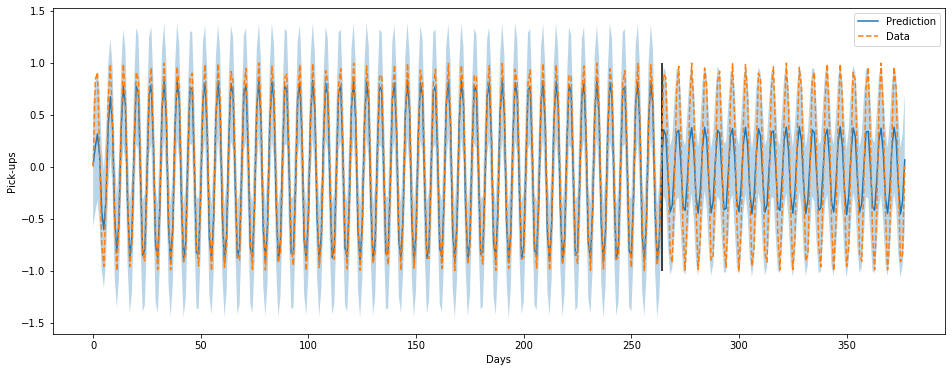

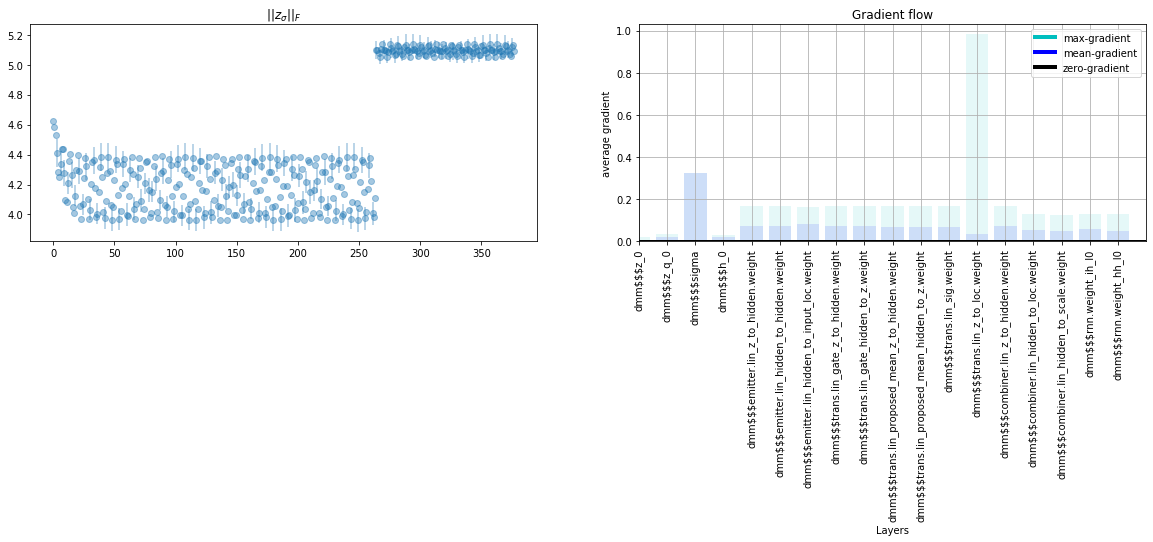

Epoch: 31, Loss: 0.351, Val Loss: 0.461, sigma: Parameter containing:
tensor([0.3262], requires_grad=True)
Epoch: 32, Loss: 0.322, Val Loss: 0.415, sigma: Parameter containing:
tensor([0.3265], requires_grad=True)
Epoch: 33, Loss: 0.295, Val Loss: 0.376, sigma: Parameter containing:
tensor([0.3268], requires_grad=True)
Epoch: 34, Loss: 0.275, Val Loss: 0.451, sigma: Parameter containing:
tensor([0.3271], requires_grad=True)
Epoch: 35, Loss: 0.283, Val Loss: 0.474, sigma: Parameter containing:
tensor([0.3273], requires_grad=True)
Epoch: 36, Loss: 0.318, Val Loss: 0.384, sigma: Parameter containing:
tensor([0.3276], requires_grad=True)
Epoch: 37, Loss: 0.309, Val Loss: 0.365, sigma: Parameter containing:
tensor([0.3278], requires_grad=True)
Epoch: 38, Loss: 0.242, Val Loss: 0.325, sigma: Parameter containing:
tensor([0.3279], requires_grad=True)
Epoch: 39, Loss: 0.223, Val Loss: 0.373, sigma: Parameter containing:
tensor([0.3281], requires_grad=True)
Epoch: 40, Loss: 0.213, Val Loss: 0.3

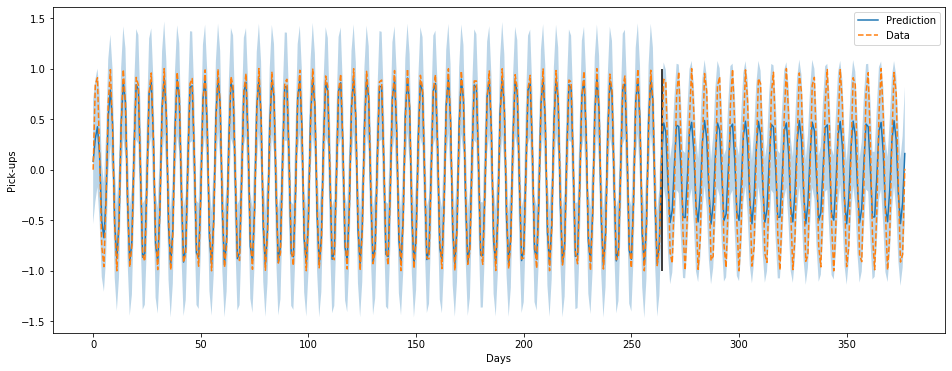

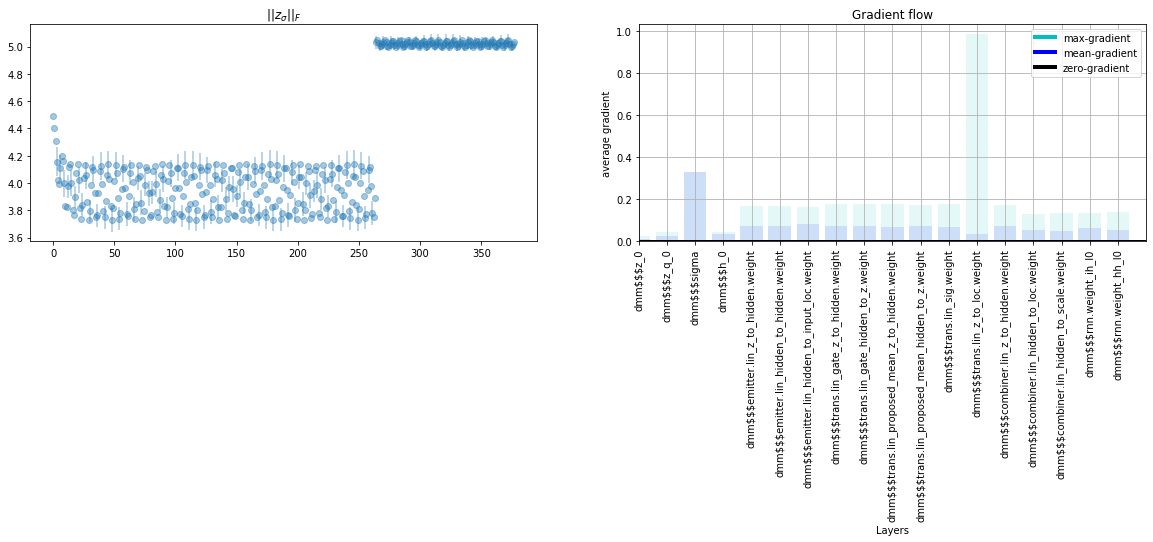

Epoch: 41, Loss: 0.221, Val Loss: 0.300, sigma: Parameter containing:
tensor([0.3283], requires_grad=True)
Epoch: 42, Loss: 0.206, Val Loss: 0.230, sigma: Parameter containing:
tensor([0.3284], requires_grad=True)
Epoch: 43, Loss: 0.189, Val Loss: 0.285, sigma: Parameter containing:
tensor([0.3285], requires_grad=True)
Epoch: 44, Loss: 0.171, Val Loss: 0.259, sigma: Parameter containing:
tensor([0.3286], requires_grad=True)
Epoch: 45, Loss: 0.172, Val Loss: 0.235, sigma: Parameter containing:
tensor([0.3286], requires_grad=True)
Epoch: 46, Loss: 0.147, Val Loss: 0.213, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 47, Loss: 0.138, Val Loss: 0.219, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 48, Loss: 0.122, Val Loss: 0.181, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 49, Loss: 0.111, Val Loss: 0.187, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 50, Loss: 0.110, Val Loss: 0.1

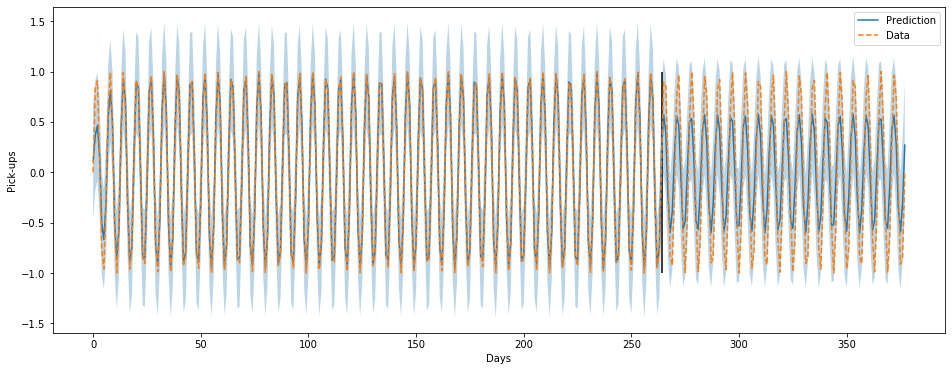

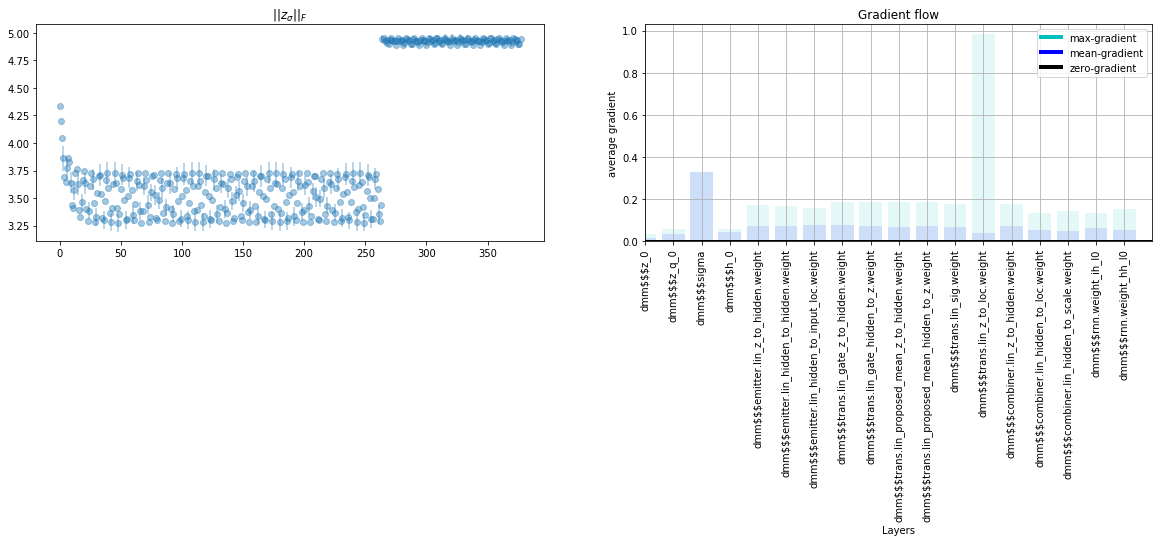

Epoch: 51, Loss: 0.099, Val Loss: 0.182, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 52, Loss: 0.100, Val Loss: 0.183, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 53, Loss: 0.098, Val Loss: 0.167, sigma: Parameter containing:
tensor([0.3286], requires_grad=True)
Epoch: 54, Loss: 0.081, Val Loss: 0.174, sigma: Parameter containing:
tensor([0.3286], requires_grad=True)
Epoch: 55, Loss: 0.079, Val Loss: 0.159, sigma: Parameter containing:
tensor([0.3285], requires_grad=True)
Epoch: 56, Loss: 0.074, Val Loss: 0.150, sigma: Parameter containing:
tensor([0.3285], requires_grad=True)
Epoch: 57, Loss: 0.066, Val Loss: 0.129, sigma: Parameter containing:
tensor([0.3284], requires_grad=True)
Epoch: 58, Loss: 0.059, Val Loss: 0.136, sigma: Parameter containing:
tensor([0.3283], requires_grad=True)
Epoch: 59, Loss: 0.064, Val Loss: 0.151, sigma: Parameter containing:
tensor([0.3282], requires_grad=True)
Epoch: 60, Loss: 0.053, Val Loss: 0.1

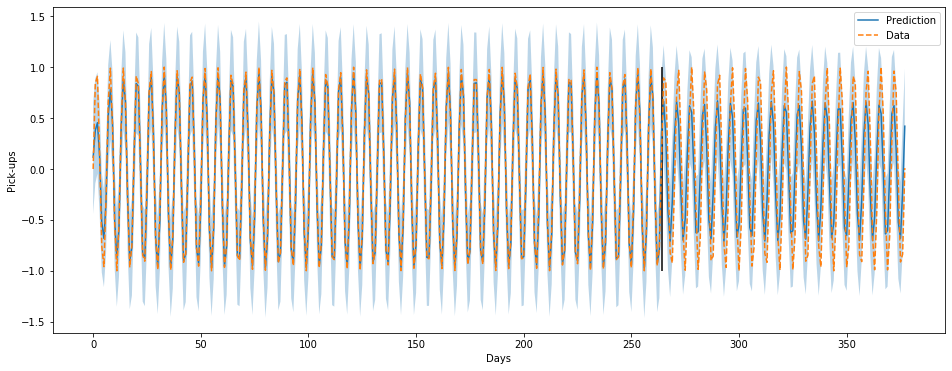

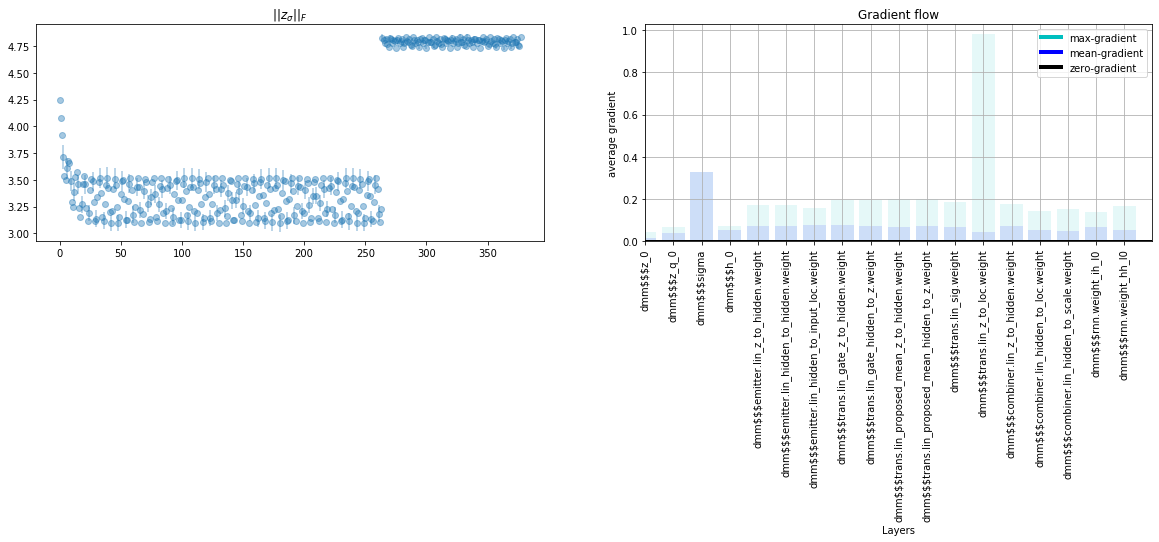

Epoch: 61, Loss: 0.049, Val Loss: 0.116, sigma: Parameter containing:
tensor([0.3281], requires_grad=True)
Epoch: 62, Loss: 0.044, Val Loss: 0.118, sigma: Parameter containing:
tensor([0.3280], requires_grad=True)
Epoch: 63, Loss: 0.031, Val Loss: 0.091, sigma: Parameter containing:
tensor([0.3279], requires_grad=True)
Epoch: 64, Loss: 0.032, Val Loss: 0.101, sigma: Parameter containing:
tensor([0.3277], requires_grad=True)
Epoch: 65, Loss: 0.021, Val Loss: 0.101, sigma: Parameter containing:
tensor([0.3276], requires_grad=True)
Epoch: 66, Loss: 0.017, Val Loss: 0.102, sigma: Parameter containing:
tensor([0.3275], requires_grad=True)
Epoch: 67, Loss: 0.007, Val Loss: 0.087, sigma: Parameter containing:
tensor([0.3274], requires_grad=True)
Epoch: 68, Loss: 0.010, Val Loss: 0.072, sigma: Parameter containing:
tensor([0.3273], requires_grad=True)
Epoch: 69, Loss: 0.002, Val Loss: 0.063, sigma: Parameter containing:
tensor([0.3271], requires_grad=True)
Epoch: 70, Loss: -0.008, Val Loss: 0.

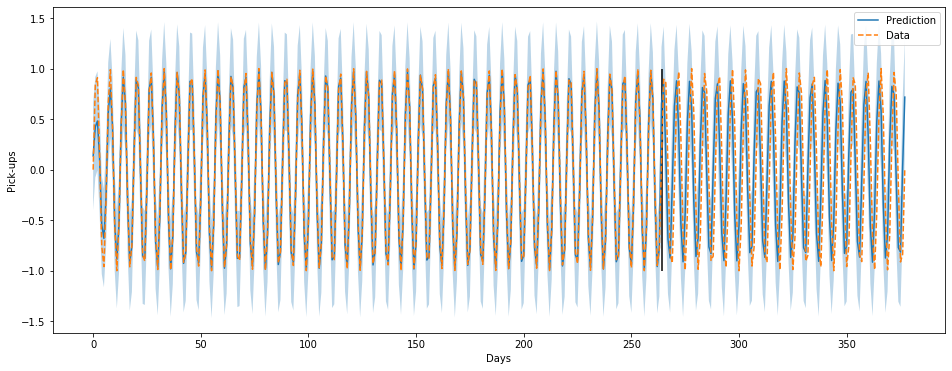

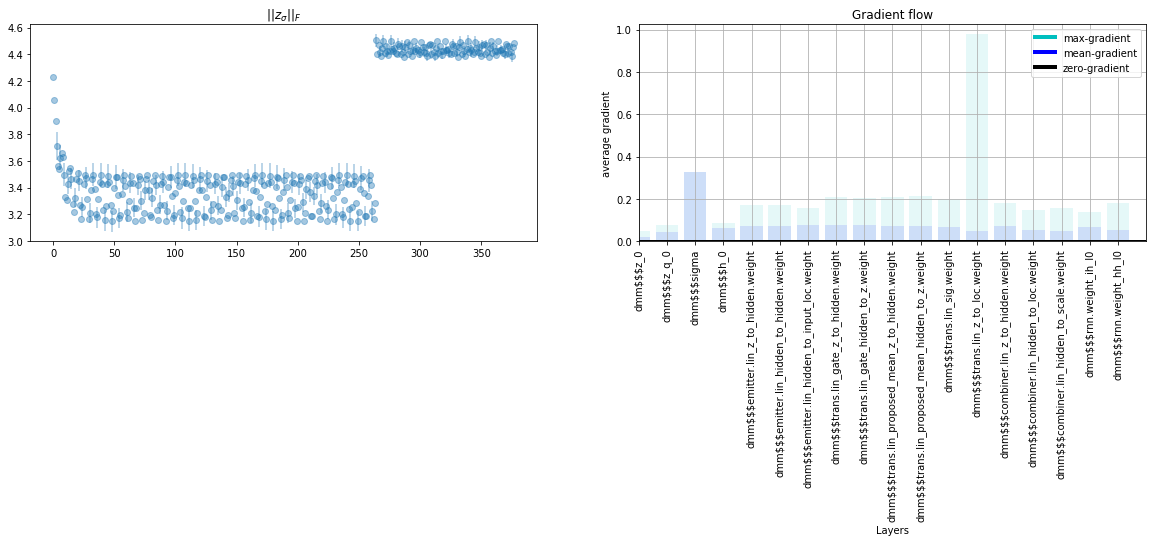

Epoch: 71, Loss: -0.012, Val Loss: 0.053, sigma: Parameter containing:
tensor([0.3269], requires_grad=True)
Epoch: 72, Loss: -0.018, Val Loss: 0.043, sigma: Parameter containing:
tensor([0.3267], requires_grad=True)
Epoch: 73, Loss: -0.023, Val Loss: 0.025, sigma: Parameter containing:
tensor([0.3266], requires_grad=True)
Epoch: 74, Loss: -0.033, Val Loss: 0.049, sigma: Parameter containing:
tensor([0.3264], requires_grad=True)
Epoch: 75, Loss: -0.024, Val Loss: 0.032, sigma: Parameter containing:
tensor([0.3263], requires_grad=True)
Epoch: 76, Loss: -0.039, Val Loss: 0.008, sigma: Parameter containing:
tensor([0.3261], requires_grad=True)
Epoch: 77, Loss: -0.042, Val Loss: 0.011, sigma: Parameter containing:
tensor([0.3260], requires_grad=True)
Epoch: 78, Loss: -0.052, Val Loss: 0.004, sigma: Parameter containing:
tensor([0.3258], requires_grad=True)
Epoch: 79, Loss: -0.049, Val Loss: 0.008, sigma: Parameter containing:
tensor([0.3257], requires_grad=True)
Epoch: 80, Loss: -0.061, Val

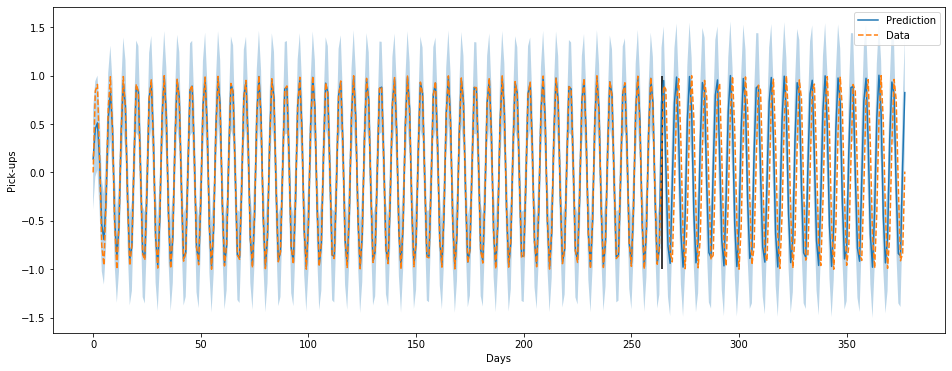

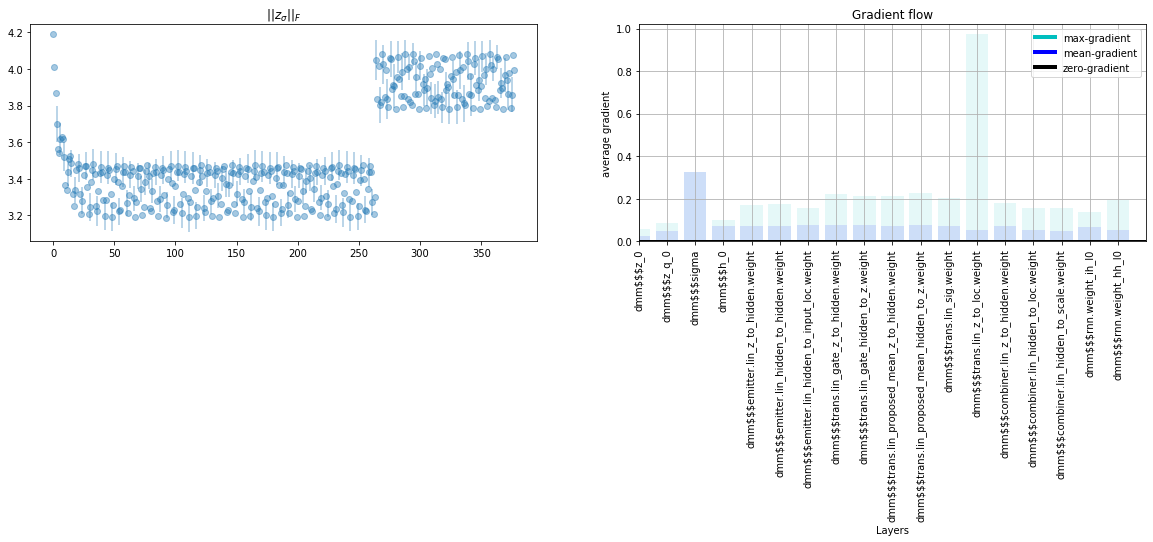

Epoch: 81, Loss: -0.062, Val Loss: -0.007, sigma: Parameter containing:
tensor([0.3254], requires_grad=True)
Epoch: 82, Loss: -0.064, Val Loss: -0.001, sigma: Parameter containing:
tensor([0.3252], requires_grad=True)
Epoch: 83, Loss: -0.070, Val Loss: -0.003, sigma: Parameter containing:
tensor([0.3250], requires_grad=True)
Epoch: 84, Loss: -0.075, Val Loss: -0.022, sigma: Parameter containing:
tensor([0.3248], requires_grad=True)
Epoch: 85, Loss: -0.079, Val Loss: -0.006, sigma: Parameter containing:
tensor([0.3247], requires_grad=True)
Epoch: 86, Loss: -0.077, Val Loss: -0.030, sigma: Parameter containing:
tensor([0.3245], requires_grad=True)
Epoch: 87, Loss: -0.085, Val Loss: -0.012, sigma: Parameter containing:
tensor([0.3243], requires_grad=True)
Epoch: 88, Loss: -0.088, Val Loss: -0.030, sigma: Parameter containing:
tensor([0.3241], requires_grad=True)
Epoch: 89, Loss: -0.090, Val Loss: -0.016, sigma: Parameter containing:
tensor([0.3240], requires_grad=True)
Epoch: 90, Loss: -0

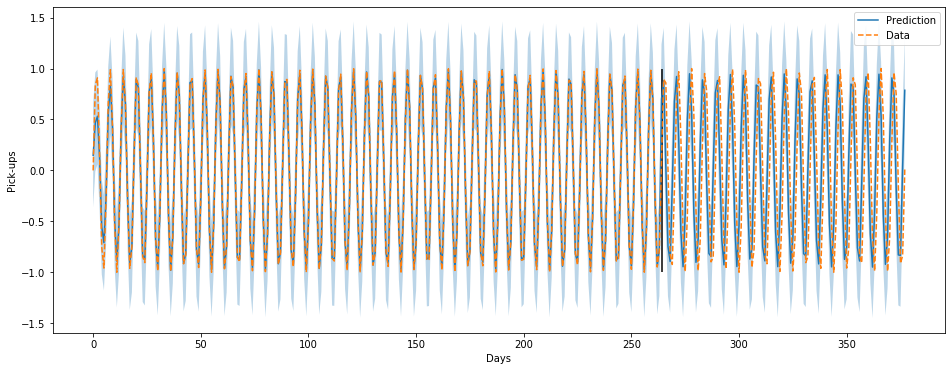

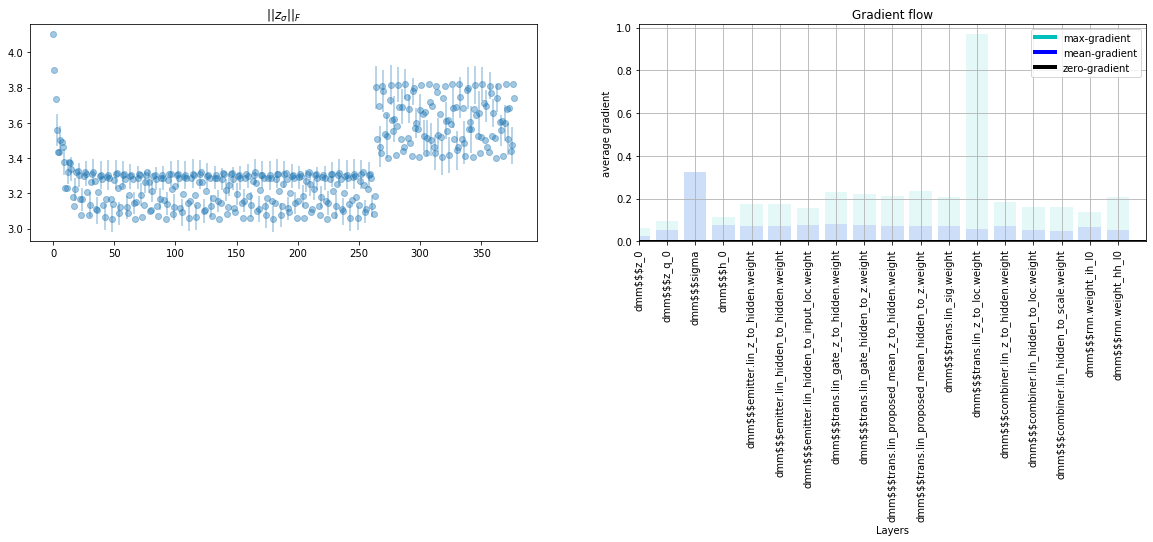

Epoch: 91, Loss: -0.096, Val Loss: -0.054, sigma: Parameter containing:
tensor([0.3236], requires_grad=True)
Epoch: 92, Loss: -0.103, Val Loss: -0.042, sigma: Parameter containing:
tensor([0.3234], requires_grad=True)
Epoch: 93, Loss: -0.100, Val Loss: -0.049, sigma: Parameter containing:
tensor([0.3232], requires_grad=True)
Epoch: 94, Loss: -0.108, Val Loss: -0.036, sigma: Parameter containing:
tensor([0.3230], requires_grad=True)
Epoch: 95, Loss: -0.110, Val Loss: -0.062, sigma: Parameter containing:
tensor([0.3228], requires_grad=True)
Epoch: 96, Loss: -0.115, Val Loss: -0.051, sigma: Parameter containing:
tensor([0.3226], requires_grad=True)
Epoch: 97, Loss: -0.119, Val Loss: -0.071, sigma: Parameter containing:
tensor([0.3224], requires_grad=True)
Epoch: 98, Loss: -0.118, Val Loss: -0.068, sigma: Parameter containing:
tensor([0.3222], requires_grad=True)
Epoch: 99, Loss: -0.123, Val Loss: -0.075, sigma: Parameter containing:
tensor([0.3220], requires_grad=True)
Epoch: 100, Loss: -

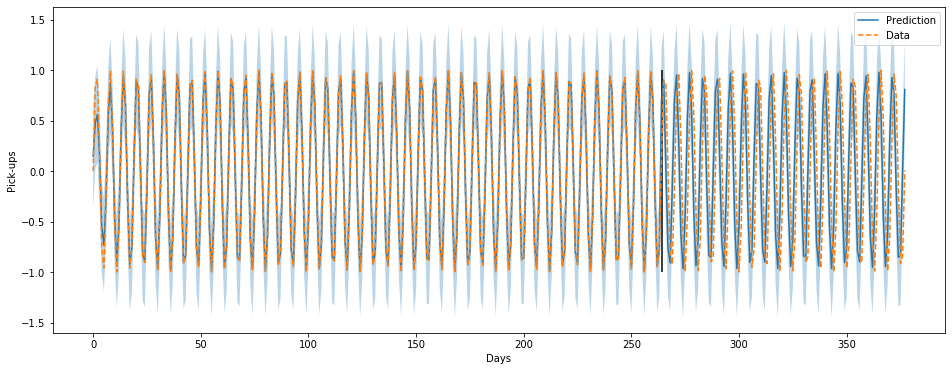

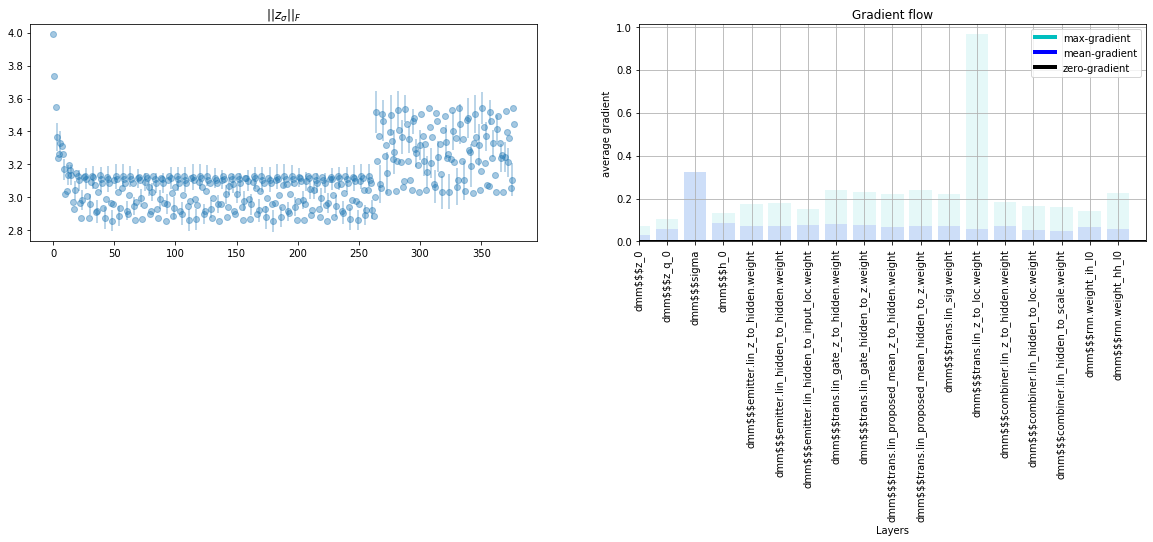

Epoch: 101, Loss: -0.127, Val Loss: -0.072, sigma: Parameter containing:
tensor([0.3216], requires_grad=True)
Epoch: 102, Loss: -0.129, Val Loss: -0.082, sigma: Parameter containing:
tensor([0.3214], requires_grad=True)
Epoch: 103, Loss: -0.133, Val Loss: -0.076, sigma: Parameter containing:
tensor([0.3212], requires_grad=True)
Epoch: 104, Loss: -0.136, Val Loss: -0.089, sigma: Parameter containing:
tensor([0.3210], requires_grad=True)
Epoch: 105, Loss: -0.134, Val Loss: -0.084, sigma: Parameter containing:
tensor([0.3207], requires_grad=True)
Epoch: 106, Loss: -0.139, Val Loss: -0.091, sigma: Parameter containing:
tensor([0.3205], requires_grad=True)
Epoch: 107, Loss: -0.137, Val Loss: -0.094, sigma: Parameter containing:
tensor([0.3203], requires_grad=True)
Epoch: 108, Loss: -0.145, Val Loss: -0.095, sigma: Parameter containing:
tensor([0.3201], requires_grad=True)
Epoch: 109, Loss: -0.145, Val Loss: -0.102, sigma: Parameter containing:
tensor([0.3199], requires_grad=True)
Epoch: 110

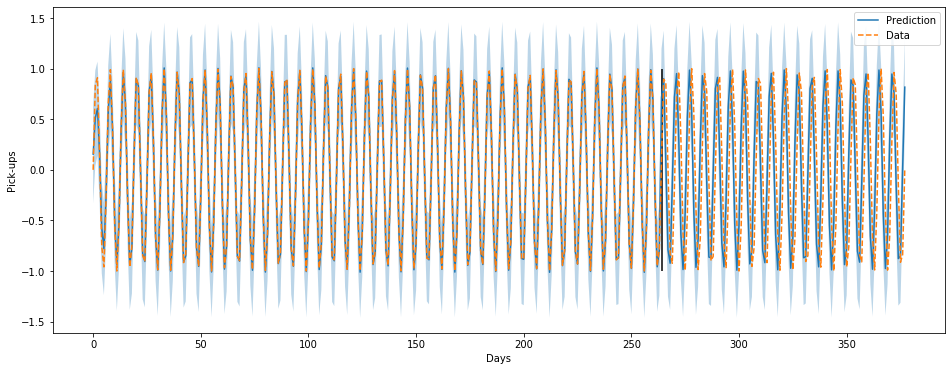

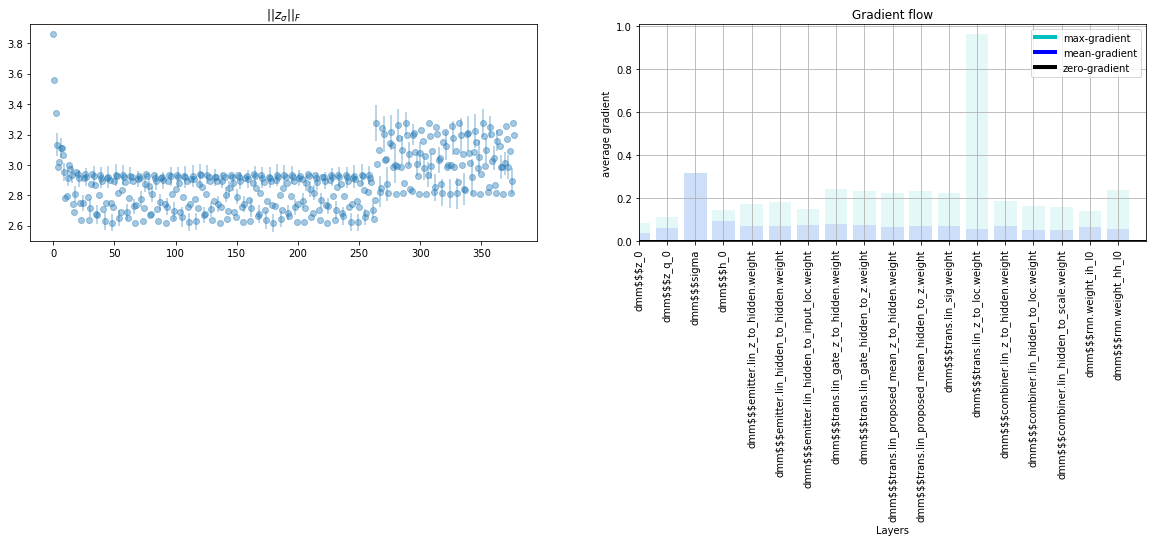

Epoch: 111, Loss: -0.151, Val Loss: -0.108, sigma: Parameter containing:
tensor([0.3194], requires_grad=True)
Epoch: 112, Loss: -0.152, Val Loss: -0.113, sigma: Parameter containing:
tensor([0.3192], requires_grad=True)
Epoch: 113, Loss: -0.155, Val Loss: -0.109, sigma: Parameter containing:
tensor([0.3189], requires_grad=True)
Epoch: 114, Loss: -0.159, Val Loss: -0.119, sigma: Parameter containing:
tensor([0.3187], requires_grad=True)
Epoch: 115, Loss: -0.158, Val Loss: -0.118, sigma: Parameter containing:
tensor([0.3185], requires_grad=True)
Epoch: 116, Loss: -0.163, Val Loss: -0.122, sigma: Parameter containing:
tensor([0.3182], requires_grad=True)
Epoch: 117, Loss: -0.163, Val Loss: -0.121, sigma: Parameter containing:
tensor([0.3180], requires_grad=True)
Epoch: 118, Loss: -0.166, Val Loss: -0.122, sigma: Parameter containing:
tensor([0.3178], requires_grad=True)
Epoch: 119, Loss: -0.166, Val Loss: -0.133, sigma: Parameter containing:
tensor([0.3175], requires_grad=True)
Epoch: 120

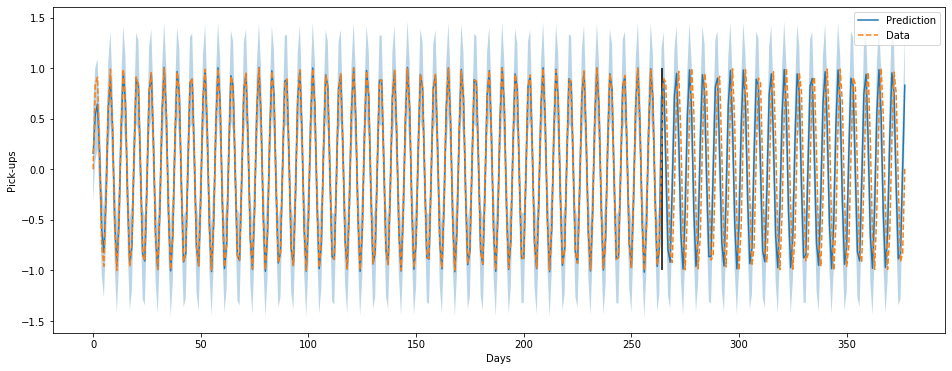

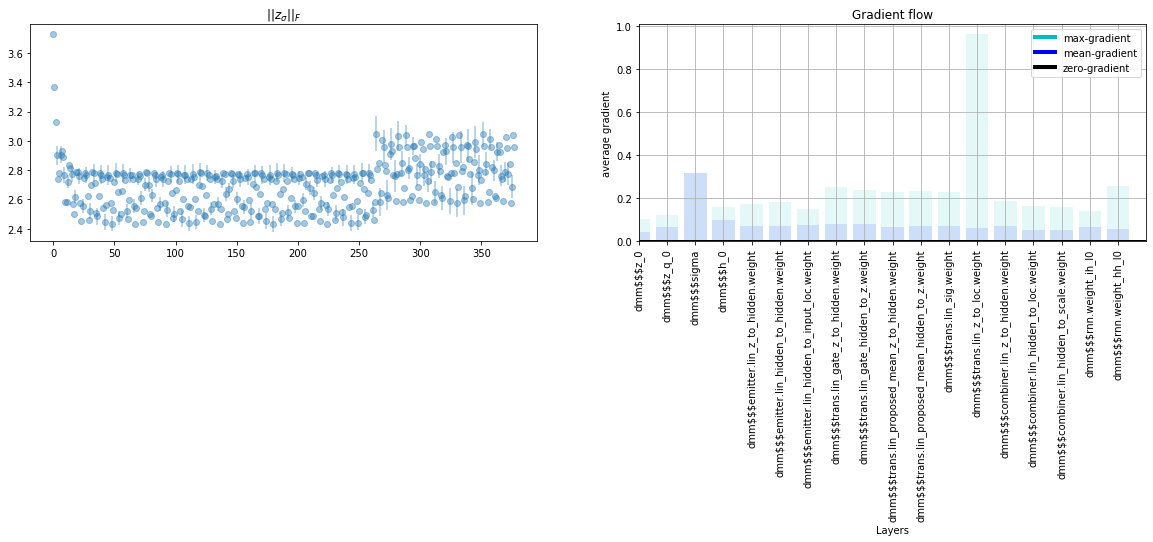

Epoch: 121, Loss: -0.169, Val Loss: -0.135, sigma: Parameter containing:
tensor([0.3170], requires_grad=True)
Epoch: 122, Loss: -0.173, Val Loss: -0.136, sigma: Parameter containing:
tensor([0.3168], requires_grad=True)
Epoch: 123, Loss: -0.174, Val Loss: -0.147, sigma: Parameter containing:
tensor([0.3165], requires_grad=True)
Epoch: 124, Loss: -0.175, Val Loss: -0.149, sigma: Parameter containing:
tensor([0.3163], requires_grad=True)
Epoch: 125, Loss: -0.176, Val Loss: -0.142, sigma: Parameter containing:
tensor([0.3160], requires_grad=True)


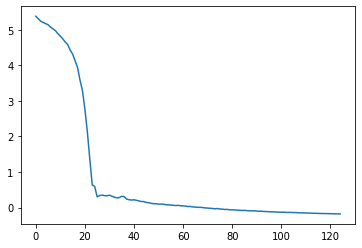

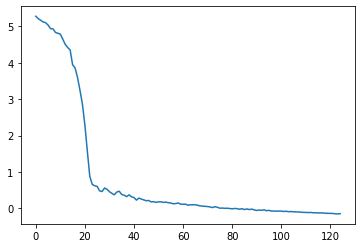

In [8]:
torch.manual_seed(10)
num_epochs = 150
losses = []
val_losses = []
pyro.clear_param_store()
for epoch in range(num_epochs):
    try:
        loss = 0
        loss += svi.step(y_train_sc)/y_train_sc.size(1)
        losses.append(loss)
        val_loss = 0
        val_loss += svi.evaluate_loss(y_val_sc) / y_val_sc.size(1)
        print("Epoch: {0}, Loss: {1:.3f}, Val Loss: {2:.3f}, sigma: {3}".format(epoch+1, loss, val_loss, dmm.sigma))
        val_losses.append(val_loss)
        
        
        if epoch % 10 == 9 or epoch==0:
            # define initial hidden state
            h_0_contig = dmm.h_0.expand(1, 1, dmm.rnn.hidden_size).contiguous()

            # define num_latent samples
            num_latent_samples = 10000

            # Expand z_prev to have dimensions (num_latent_samples, latent_size)
            z_prev = dmm.z_0.expand(num_latent_samples, dmm.z_0.size(0))

            # book-keeping
            z_samples = []
            z_scales = [[], []]
            y_samples = []
            y_mean = []
            y_025 = []
            y_975 = []

            # Train Predictions
            rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :T, :].float(), h_0_contig)

            # reverse rnn_output to get initial ordering
            #             rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

            rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

            for t in range(T):
                # compute mean and variance of z_t
                z_loc, z_scale = dmm.combiner(z_prev, rnn_output[:, t, :])
                z_scales[0].append(z_scale.norm(dim=1).mean().item())
                z_scales[1].append(z_scale.norm(dim=1).std().item())
                # sample from z_t distribution
                z_t = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
                if t != T-1:
                    z_samples.append(z_t)

                # compute mean of y_t
                y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

                # sample from y_t distribution
                y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
                y_samples.append(y_t)

                # store z_t for next computation
                if t != T-1:
                    z_prev = z_samples[-1]

                # store predictions and CI
                y_mean.append(np.mean(y_t, axis=0))
                y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
                y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

            # Test Predictions
            for t in range(T+1, T + T_pred + 1):
                rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :t, :].float(), h_0_contig)

                # reverse rnn_output to get initial ordering
            #                 rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

                rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

                # compute mean and variance of z_t_1
                z_loc, z_scale = dmm.combiner(z_samples[-1], rnn_output[:, -1, :])

                # sample from z_t_1 distribution
                z_t_1 = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
                z_samples.append(z_t_1)

                # run transition network forward
                z_t_loc, z_t_scale = dmm.trans(z_t_1)
                z_scales[0].append(z_t_scale.norm(dim=1).mean().item())
                z_scales[1].append(z_t_scale.norm(dim=1).std().item())
                z_t = dist.Normal(loc=z_t_loc, scale=z_t_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)

                # compute mean of y_t
                y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

                # sample from y_t distribution
                y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
                y_samples.append(y_t)

                # store predictions and CI
                y_mean.append(np.mean(y_t, axis=0))
                y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
                y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

            # compute predictions
            y_pred = scaler.inverse_transform(np.array(y_mean))
            y_025 = scaler.inverse_transform(np.array(y_025))
            y_975 = scaler.inverse_transform(np.array(y_975))



            for hub in range(y_sc.shape[2]):
                print("\n SUPER-HUB ", hub+1)
                print("\n==== Train Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                                       mean_absolute_error(y_train[ :, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                                       np.sqrt(mean_squared_error(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]))))
                print("==== Validation Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                                       mean_absolute_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                                       np.sqrt(mean_squared_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]))))
                print("==== Test Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                                       mean_absolute_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                                       np.sqrt(mean_squared_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]))))
                plt.figure(figsize=(16, 6))
                plt.plot(y_pred[:,hub], label="Prediction")
                plt.fill_between(np.arange(len(y_025[:,hub])), y_025[:,hub], y_975[:,hub], alpha=0.3)
                plt.vlines(T, ymin=y.min(),ymax=y.max())
                plt.plot(np.arange(T+T_pred), y.flatten(), label="Data", linestyle="--")
                plt.xlabel("Days")
                plt.ylabel("Pick-ups")
                plt.legend()
                plt.show()
            
            # Plot train statistics
            fig = plt.figure(figsize=(20,4))
            fig.add_subplot(121)
            plt.errorbar(np.arange(len(z_scales[0])), z_scales[0], np.array(z_scales[1]), fmt='o', alpha=0.4, errorevery=3)
            plt.title(r"$||z_{\sigma}||_F$")
            fig.add_subplot(122)
            plot_grad_flow(pyro.get_param_store().named_parameters())
            
    except KeyboardInterrupt:
        plt.plot(np.arange(len(losses)), losses)
        plt.show()
        plt.plot(np.arange(len(val_losses)), val_losses)
        plt.show()
        break

train t:  0
train t:  1
train t:  2
train t:  3
train t:  4
train t:  5
train t:  6
train t:  7
train t:  8
train t:  9
train t:  10
train t:  11
train t:  12
train t:  13
train t:  14
train t:  15
train t:  16
train t:  17
train t:  18
train t:  19
train t:  20
train t:  21
train t:  22
train t:  23
train t:  24
train t:  25
train t:  26
train t:  27
train t:  28
train t:  29
train t:  30
train t:  31
train t:  32
train t:  33
train t:  34
train t:  35
train t:  36
train t:  37
train t:  38
train t:  39
train t:  40
train t:  41
train t:  42
train t:  43
train t:  44
train t:  45
train t:  46
train t:  47
train t:  48
train t:  49
train t:  50
train t:  51
train t:  52
train t:  53
train t:  54
train t:  55
train t:  56
train t:  57
train t:  58
train t:  59
train t:  60
train t:  61
train t:  62
train t:  63
train t:  64
train t:  65
train t:  66
train t:  67
train t:  68
train t:  69
train t:  70
train t:  71
train t:  72
train t:  73
train t:  74
train t:  75
train t:  76
train t: 

test t:  372
len:  torch.Size([1, 372, 1])
test t:  373
len:  torch.Size([1, 373, 1])
test t:  374
len:  torch.Size([1, 374, 1])
test t:  375
len:  torch.Size([1, 375, 1])
test t:  376
len:  torch.Size([1, 376, 1])
test t:  377
len:  torch.Size([1, 377, 1])

 SUPER-HUB  1

==== Train Results ====
R2: 0.998, MAE: 0.013, RMSE: 0.030
==== Validation Results ====
R2: 1.000, MAE: 0.011, RMSE: 0.013
==== Test Results ====
R2: 1.000, MAE: 0.012, RMSE: 0.014


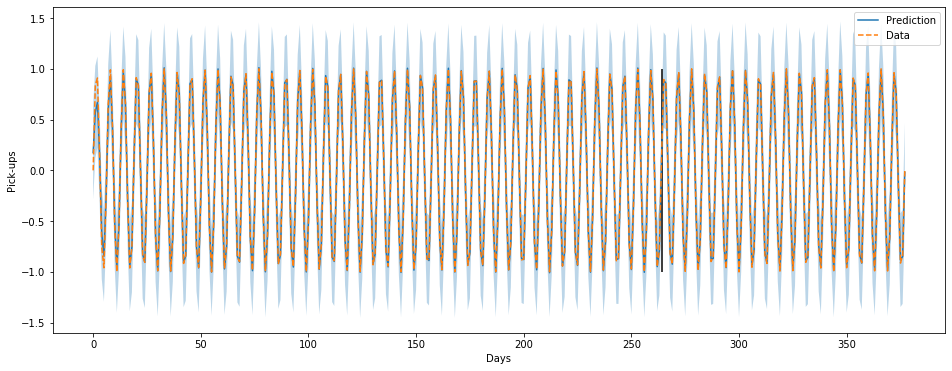

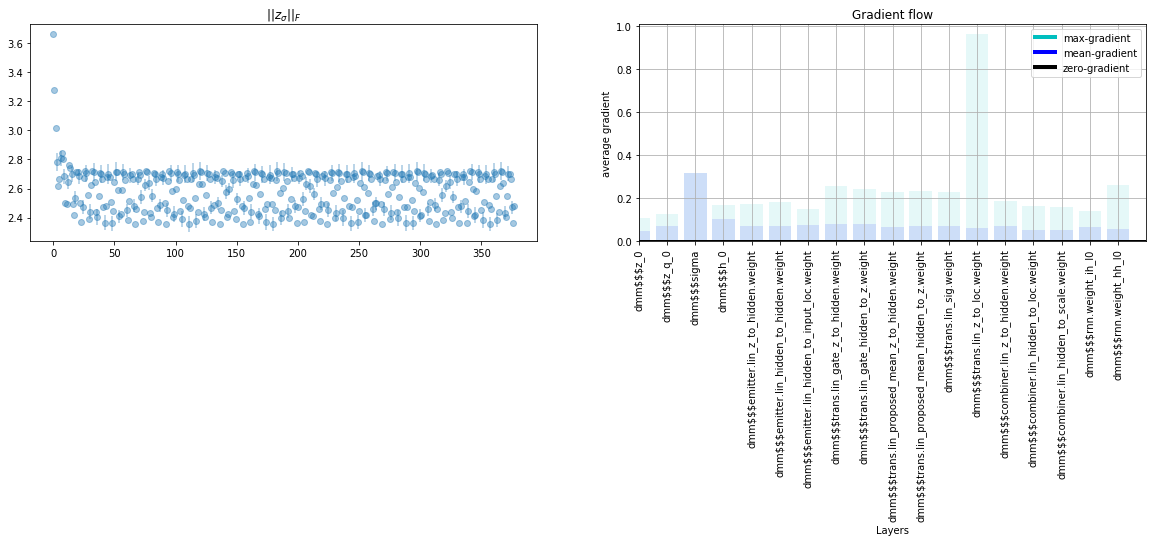

In [11]:
# define initial hidden state
h_0_contig = dmm.h_0.expand(1, 1, dmm.rnn.hidden_size).contiguous()

# define num_latent samples
num_latent_samples = 10000

# Expand z_prev to have dimensions (num_latent_samples, latent_size)
z_prev = dmm.z_0.expand(num_latent_samples, dmm.z_0.size(0))

# book-keeping
z_samples = []
z_scales = [[], []]
y_samples = []
y_mean = []
y_025 = []
y_975 = []

# Train Predictions
rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :T, :].float(), h_0_contig)

# reverse rnn_output to get initial ordering
#             rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

for t in range(T):
    # compute mean and variance of z_t
    z_loc, z_scale = dmm.combiner(z_prev, rnn_output[:, t, :])
    z_scales[0].append(z_scale.norm(dim=1).mean().item())
    z_scales[1].append(z_scale.norm(dim=1).std().item())
    # sample from z_t distribution
    z_t = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
    if t != T-1:
        z_samples.append(z_t)

    # compute mean of y_t
    y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

    # sample from y_t distribution
    y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
    y_samples.append(y_t)

    # store z_t for next computation
    if t != T-1:
        z_prev = z_samples[-1]

    # store predictions and CI
    y_mean.append(np.mean(y_t, axis=0))
    y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
    y_975.append(np.quantile(a=y_t, q=0.975, axis=0))
    print("train t: ", t)
# Test Predictions
for t in range(T, T + T_pred):
    print("test t: ", t)
    print("len: ", y_sc[:, :t, :].shape)
    rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :t, :].float(), h_0_contig)

    # reverse rnn_output to get initial ordering
#                 rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

    rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

    # compute mean and variance of z_t_1
    z_loc, z_scale = dmm.combiner(z_samples[-1], rnn_output[:, -1, :])
    z_scales[0].append(z_scale.norm(dim=1).mean().item())
    z_scales[1].append(z_scale.norm(dim=1).std().item())
    # sample from z_t_1 distribution
    z_t_1 = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
    z_samples.append(z_t_1)

    # run transition network forward
    z_t_loc, z_t_scale = dmm.trans(z_t_1)
    
    z_t = dist.Normal(loc=z_t_loc, scale=z_t_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)

    # compute mean of y_t
    y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

    # sample from y_t distribution
    y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
    y_samples.append(y_t)

    # store predictions and CI
    y_mean.append(np.mean(y_t, axis=0))
    y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
    y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

# compute predictions
y_pred = scaler.inverse_transform(np.array(y_mean))
y_025 = scaler.inverse_transform(np.array(y_025))
y_975 = scaler.inverse_transform(np.array(y_975))



for hub in range(y_sc.shape[2]):
    print("\n SUPER-HUB ", hub+1)
    print("\n==== Train Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                           mean_absolute_error(y_train[ :, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                           np.sqrt(mean_squared_error(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]))))
    print("==== Validation Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                           mean_absolute_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                           np.sqrt(mean_squared_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]))))
    print("==== Test Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                           mean_absolute_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                           np.sqrt(mean_squared_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]))))
    plt.figure(figsize=(16, 6))
    plt.plot(y_pred[:,hub], label="Prediction")
    plt.fill_between(np.arange(len(y_025[:,hub])), y_025[:,hub], y_975[:,hub], alpha=0.3)
    plt.vlines(T, ymin=y.min(),ymax=y.max())
    plt.plot(np.arange(T+T_pred), y.flatten(), label="Data", linestyle="--")
    plt.xlabel("Days")
    plt.ylabel("Pick-ups")
    plt.legend()
    plt.show()

# Plot train statistics
fig = plt.figure(figsize=(20,4))
fig.add_subplot(121)
plt.errorbar(np.arange(len(z_scales[0])), z_scales[0], np.array(z_scales[1]), fmt='o', alpha=0.4, errorevery=3)
plt.title(r"$||z_{\sigma}||_F$")
fig.add_subplot(122)
plot_grad_flow(pyro.get_param_store().named_parameters())

### Donkey Data

In [18]:
plt.style.use("ggplot")

In [19]:
# Load data from 3 super-hubs
y_3 = np.load("/Users/danielegammelli/Desktop/UNIVERSITA/DOTTORATO/DTU/Materiale/Dataset/Donkey Republic/y.npy")
y_3 = y_3[:, 0].reshape(-1,1)
y_3.shape

(378, 1)

In [20]:
# Split data between train and test 
T = 264 # train data
T_pred = y_3.shape[0] - T # prediction horizon
T_val = T_test = T_pred//2

In [21]:
y = y_3[:,0].reshape(-1,1)
y_train = y[:T].reshape(-1,1)
y_val = y[T:T+T_val].reshape(-1,1)
y_test = y[T+T_val:T+T_val+T_test].reshape(-1,1)

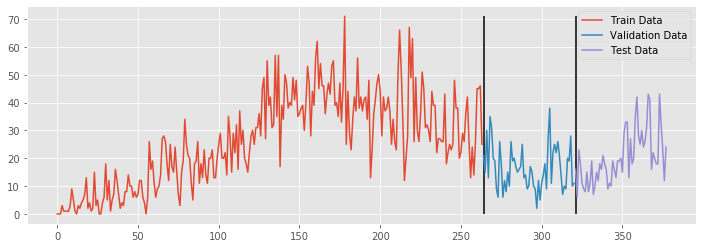

In [22]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(T), y_train, label="Train Data")
plt.vlines(T, ymin=y.min(),ymax=y.max())
plt.vlines(T+T_val, ymin=y.min(),ymax=y.max())
plt.plot(np.arange(T, T + T_val), y_val, label="Validation Data")
plt.plot(np.arange(T + T_val, T + T_val + T_test), y_test, label="Test Data")
plt.legend()
plt.show()

In [23]:
# Standardize data
scaler = StandardScaler()
y_train_sc = scaler.fit_transform(y_train.reshape(-1,y_3.shape[1]))
y_val_sc = scaler.transform(y_val.reshape(-1,y_3.shape[1]))
y_test_sc = scaler.transform(y_test.reshape(-1,y_3.shape[1]))
y_sc = scaler.transform(y.reshape(-1,y_3.shape[1]))

# Transform to torch.tensor and reshape
y_train_sc = torch.from_numpy(y_train_sc).reshape(1, T, y_train_sc.shape[1])
y_val_sc = torch.from_numpy(y_val_sc).reshape(1, T_val, y_val_sc.shape[1])
y_test_sc = torch.from_numpy(y_test_sc).reshape(1, T_test, y_test_sc.shape[1])
y_sc = torch.from_numpy(y_sc).reshape(1, y_sc.shape[0], y_sc.shape[1])

## Non-Reversed Recognition Network

In [25]:
use_cuda = False
dmm = DMM(use_cuda=use_cuda, annealing_factor=0.01, input_dim=1, z_dim=50, rnn_dim=100, emission_dim=50, transition_dim=50)
svi = SVI(dmm.model, dmm.guide, optim=pyro.optim.Adam({"lr":0.001}), loss=Trace_ELBO(num_particles=10))

In [26]:
if use_cuda:
    y_sc = y_sc.float().cuda()
    y_train_sc = y_train_sc.float().cuda()
    y_val_sc = y_val_sc.float().cuda()
    y_test_sc = y_test_sc.float().cuda()
y_sc = y_sc.float()
y_train_sc = y_train_sc.float()
y_val_sc = y_val_sc.float()
y_test_sc = y_test_sc.float()

Epoch: 1, Loss: 5.395, Val Loss: 3.235, sigma: Parameter containing:
tensor([0.3010], requires_grad=True)

 SUPER-HUB  1

==== Train Results ====
R2: 0.000, MAE: 13.559, RMSE: 16.252
==== Validation Results ====
R2: -1.683, MAE: 11.102, RMSE: 12.683
==== Test Results ====
R2: -0.448, MAE: 9.848, RMSE: 11.230


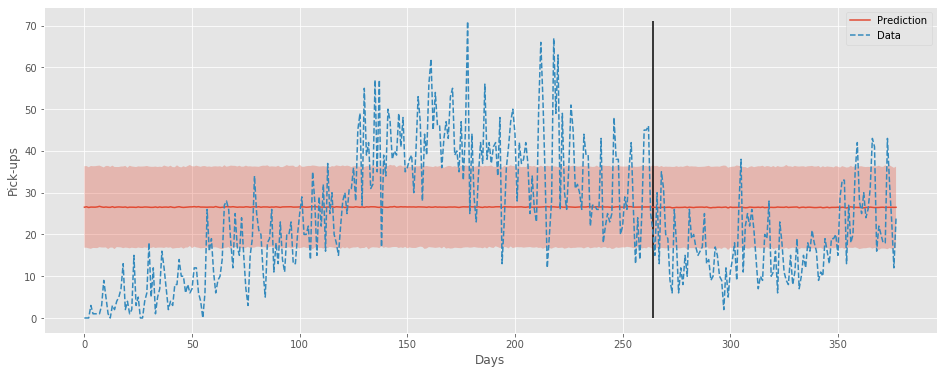

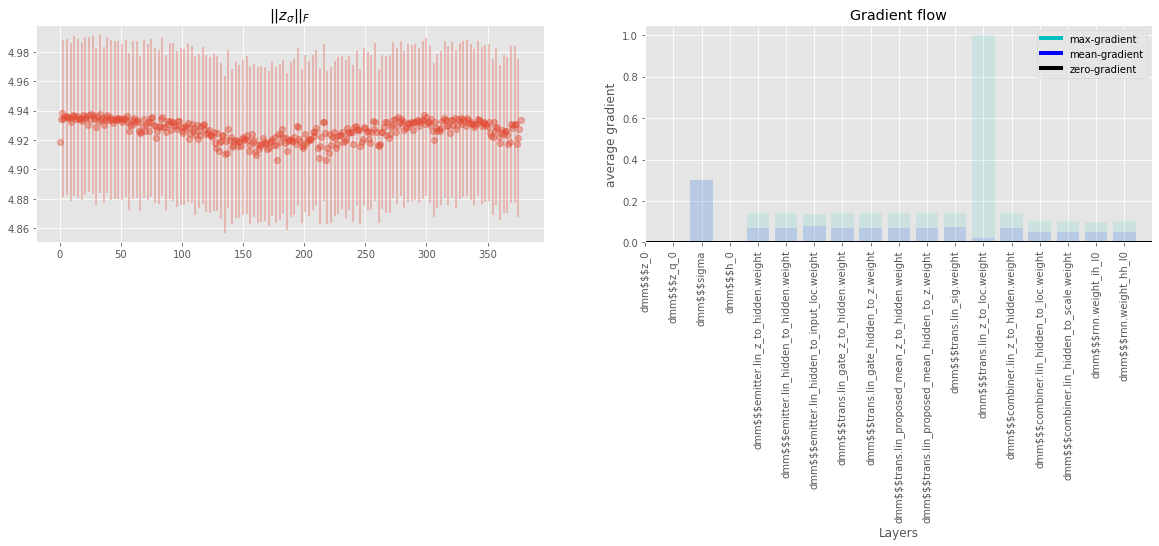

Epoch: 2, Loss: 5.318, Val Loss: 3.093, sigma: Parameter containing:
tensor([0.3020], requires_grad=True)
Epoch: 3, Loss: 5.255, Val Loss: 2.980, sigma: Parameter containing:
tensor([0.3030], requires_grad=True)
Epoch: 4, Loss: 5.224, Val Loss: 2.937, sigma: Parameter containing:
tensor([0.3040], requires_grad=True)
Epoch: 5, Loss: 5.198, Val Loss: 2.820, sigma: Parameter containing:
tensor([0.3050], requires_grad=True)
Epoch: 6, Loss: 5.137, Val Loss: 2.801, sigma: Parameter containing:
tensor([0.3060], requires_grad=True)
Epoch: 7, Loss: 5.086, Val Loss: 2.766, sigma: Parameter containing:
tensor([0.3070], requires_grad=True)
Epoch: 8, Loss: 5.024, Val Loss: 2.706, sigma: Parameter containing:
tensor([0.3080], requires_grad=True)
Epoch: 9, Loss: 4.986, Val Loss: 2.709, sigma: Parameter containing:
tensor([0.3090], requires_grad=True)
Epoch: 10, Loss: 4.942, Val Loss: 2.692, sigma: Parameter containing:
tensor([0.3100], requires_grad=True)

 SUPER-HUB  1

==== Train Results ====
R2: 0

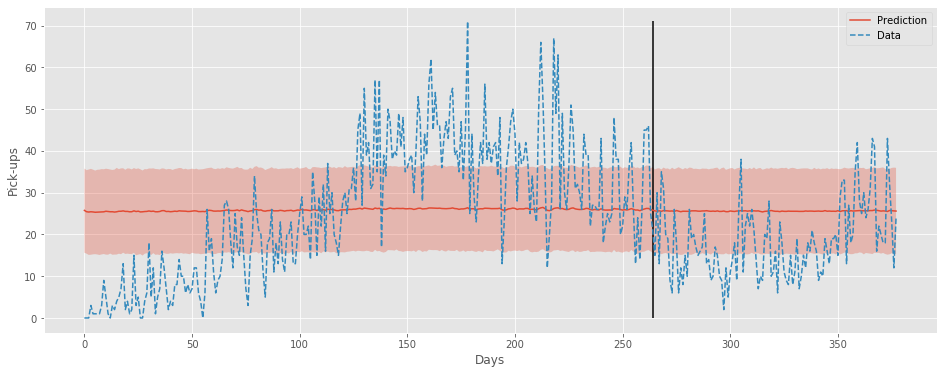

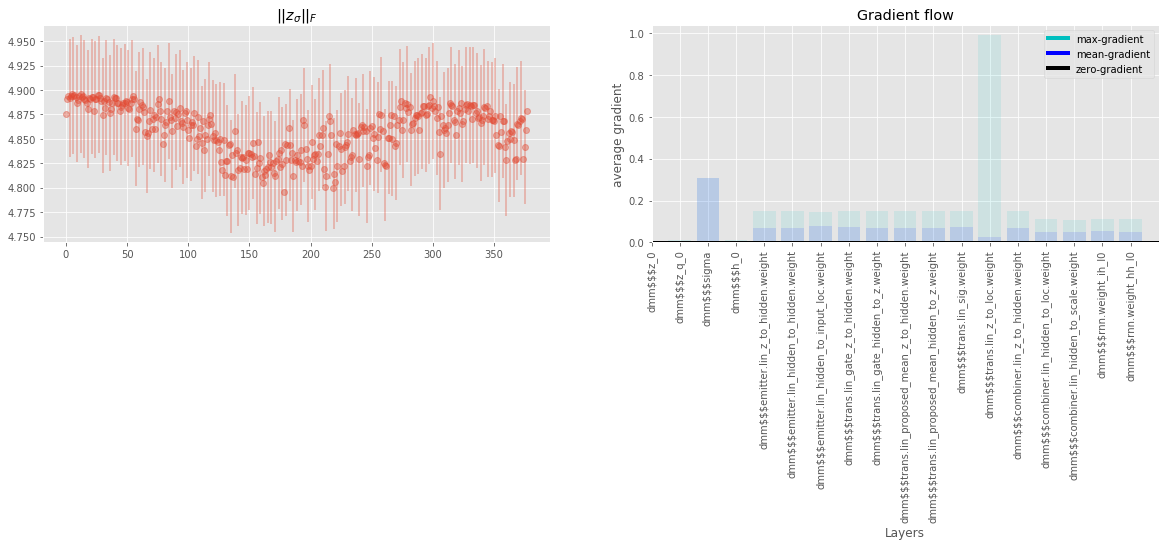

Epoch: 11, Loss: 4.883, Val Loss: 2.603, sigma: Parameter containing:
tensor([0.3109], requires_grad=True)
Epoch: 12, Loss: 4.798, Val Loss: 2.633, sigma: Parameter containing:
tensor([0.3119], requires_grad=True)
Epoch: 13, Loss: 4.707, Val Loss: 2.544, sigma: Parameter containing:
tensor([0.3129], requires_grad=True)
Epoch: 14, Loss: 4.621, Val Loss: 2.467, sigma: Parameter containing:
tensor([0.3139], requires_grad=True)
Epoch: 15, Loss: 4.505, Val Loss: 2.453, sigma: Parameter containing:
tensor([0.3148], requires_grad=True)
Epoch: 16, Loss: 4.353, Val Loss: 2.366, sigma: Parameter containing:
tensor([0.3158], requires_grad=True)
Epoch: 17, Loss: 4.230, Val Loss: 2.116, sigma: Parameter containing:
tensor([0.3168], requires_grad=True)
Epoch: 18, Loss: 4.039, Val Loss: 1.903, sigma: Parameter containing:
tensor([0.3177], requires_grad=True)
Epoch: 19, Loss: 3.717, Val Loss: 1.616, sigma: Parameter containing:
tensor([0.3186], requires_grad=True)
Epoch: 20, Loss: 3.479, Val Loss: 1.2

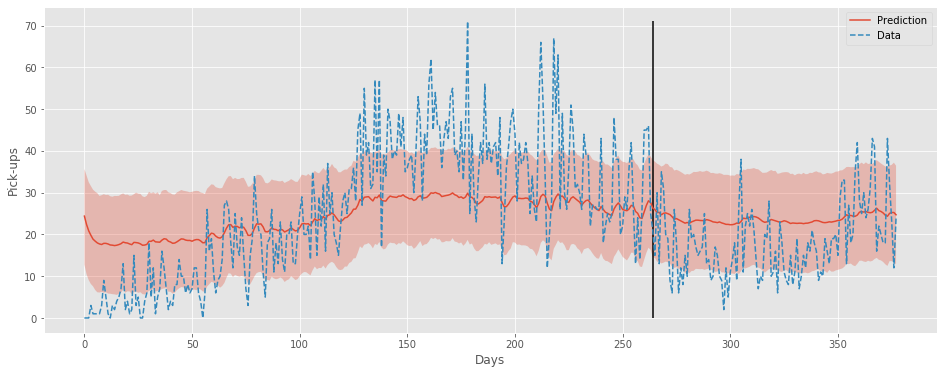

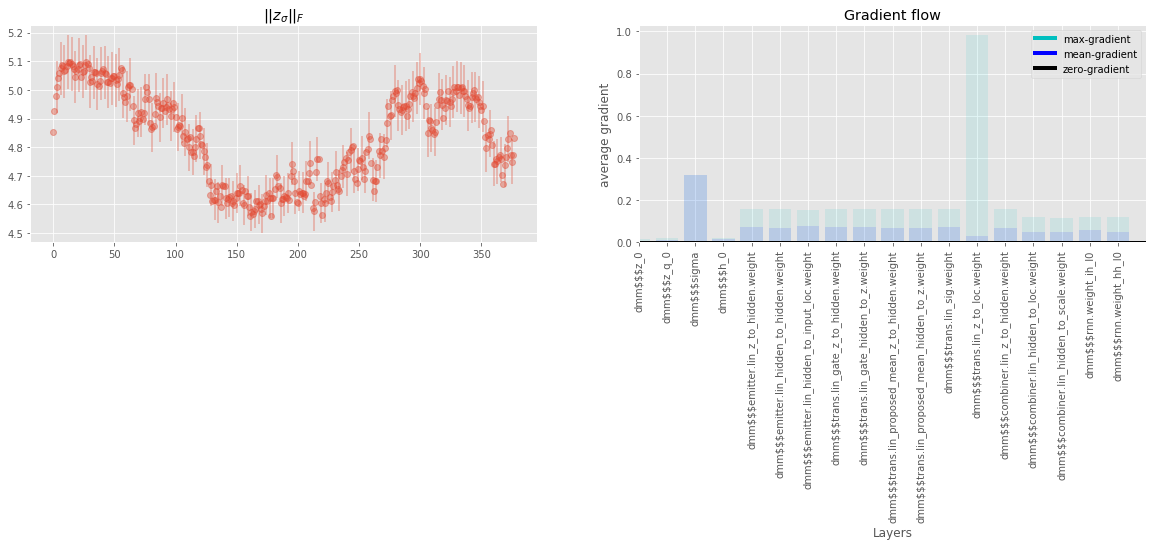

Epoch: 21, Loss: 3.077, Val Loss: 0.972, sigma: Parameter containing:
tensor([0.3204], requires_grad=True)
Epoch: 22, Loss: 2.600, Val Loss: 1.093, sigma: Parameter containing:
tensor([0.3213], requires_grad=True)
Epoch: 23, Loss: 2.190, Val Loss: 1.267, sigma: Parameter containing:
tensor([0.3221], requires_grad=True)
Epoch: 24, Loss: 2.032, Val Loss: 1.246, sigma: Parameter containing:
tensor([0.3229], requires_grad=True)
Epoch: 25, Loss: 1.713, Val Loss: 1.722, sigma: Parameter containing:
tensor([0.3237], requires_grad=True)
Epoch: 26, Loss: 1.732, Val Loss: 2.502, sigma: Parameter containing:
tensor([0.3244], requires_grad=True)
Epoch: 27, Loss: 1.920, Val Loss: 2.041, sigma: Parameter containing:
tensor([0.3251], requires_grad=True)
Epoch: 28, Loss: 1.889, Val Loss: 1.549, sigma: Parameter containing:
tensor([0.3257], requires_grad=True)
Epoch: 29, Loss: 1.758, Val Loss: 1.357, sigma: Parameter containing:
tensor([0.3264], requires_grad=True)
Epoch: 30, Loss: 1.599, Val Loss: 1.1

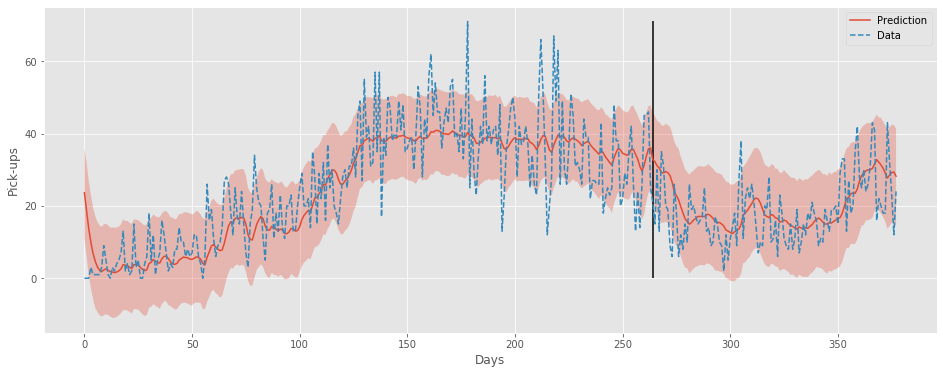

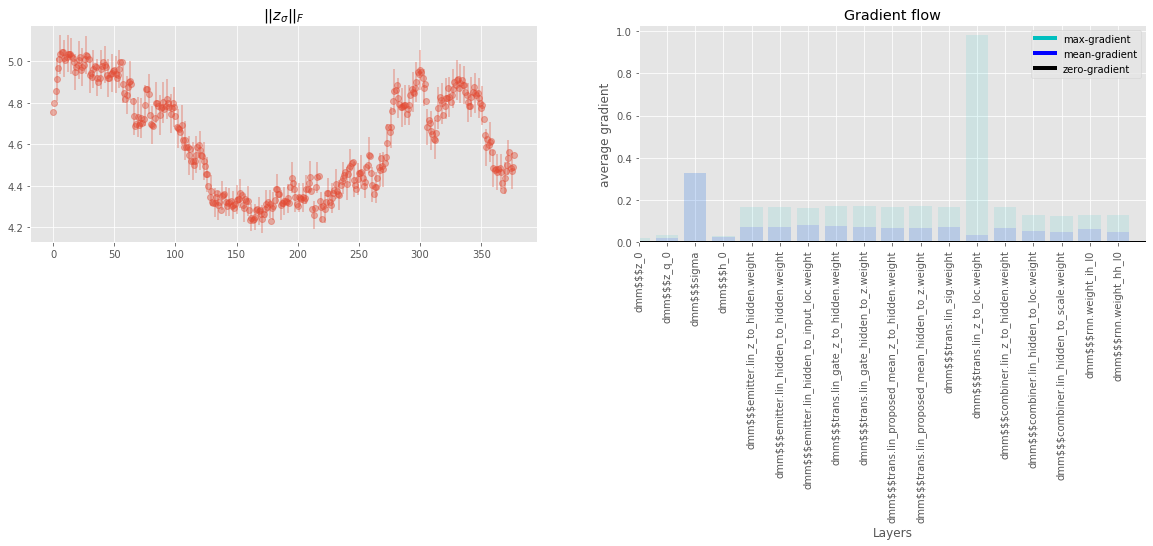

Epoch: 31, Loss: 1.578, Val Loss: 1.044, sigma: Parameter containing:
tensor([0.3276], requires_grad=True)
Epoch: 32, Loss: 1.505, Val Loss: 0.910, sigma: Parameter containing:
tensor([0.3282], requires_grad=True)
Epoch: 33, Loss: 1.521, Val Loss: 0.854, sigma: Parameter containing:
tensor([0.3287], requires_grad=True)
Epoch: 34, Loss: 1.497, Val Loss: 0.865, sigma: Parameter containing:
tensor([0.3293], requires_grad=True)
Epoch: 35, Loss: 1.526, Val Loss: 0.925, sigma: Parameter containing:
tensor([0.3298], requires_grad=True)
Epoch: 36, Loss: 1.522, Val Loss: 0.855, sigma: Parameter containing:
tensor([0.3303], requires_grad=True)
Epoch: 37, Loss: 1.521, Val Loss: 0.867, sigma: Parameter containing:
tensor([0.3308], requires_grad=True)
Epoch: 38, Loss: 1.475, Val Loss: 0.874, sigma: Parameter containing:
tensor([0.3312], requires_grad=True)
Epoch: 39, Loss: 1.436, Val Loss: 0.874, sigma: Parameter containing:
tensor([0.3317], requires_grad=True)
Epoch: 40, Loss: 1.399, Val Loss: 0.8

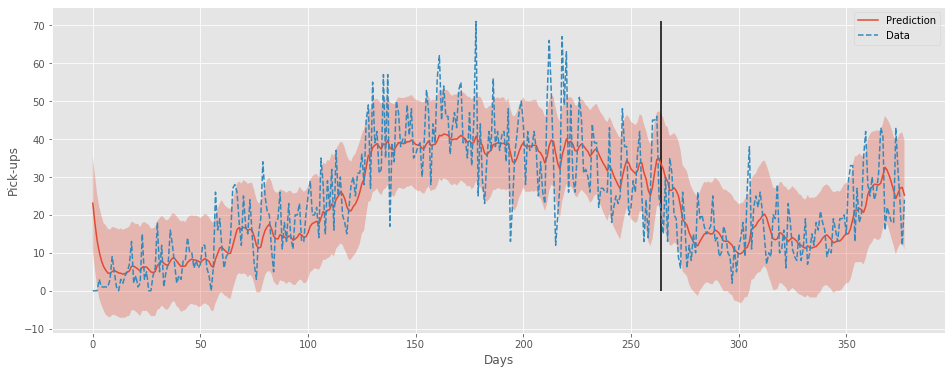

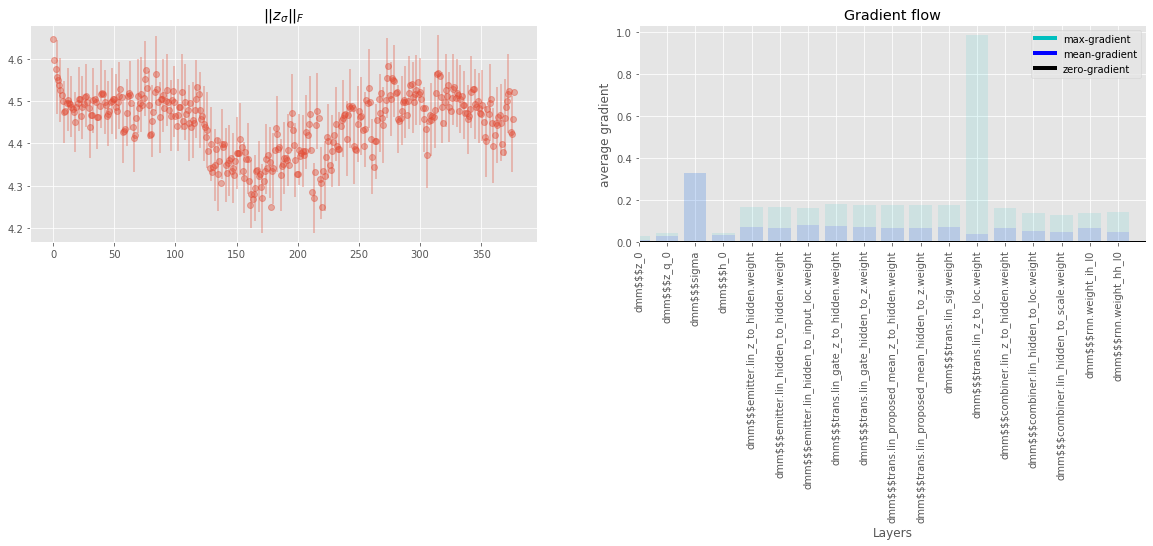

Epoch: 41, Loss: 1.359, Val Loss: 0.936, sigma: Parameter containing:
tensor([0.3326], requires_grad=True)
Epoch: 42, Loss: 1.352, Val Loss: 0.867, sigma: Parameter containing:
tensor([0.3330], requires_grad=True)
Epoch: 43, Loss: 1.339, Val Loss: 0.880, sigma: Parameter containing:
tensor([0.3334], requires_grad=True)
Epoch: 44, Loss: 1.327, Val Loss: 0.800, sigma: Parameter containing:
tensor([0.3338], requires_grad=True)
Epoch: 45, Loss: 1.295, Val Loss: 0.719, sigma: Parameter containing:
tensor([0.3342], requires_grad=True)
Epoch: 46, Loss: 1.299, Val Loss: 0.855, sigma: Parameter containing:
tensor([0.3346], requires_grad=True)
Epoch: 47, Loss: 1.299, Val Loss: 0.782, sigma: Parameter containing:
tensor([0.3350], requires_grad=True)


In [ ]:
torch.manual_seed(10)
num_epochs = 500
losses = []
val_losses = []
pyro.clear_param_store()
for epoch in range(num_epochs):
    try:
        loss = 0
        loss += svi.step(y_train_sc)/y_train_sc.size(1)
        losses.append(loss)
        val_loss = 0
        val_loss += svi.evaluate_loss(y_val_sc) / y_val_sc.size(1)
        print("Epoch: {0}, Loss: {1:.3f}, Val Loss: {2:.3f}, sigma: {3}".format(epoch+1, loss, val_loss, dmm.sigma))
        val_losses.append(val_loss)
        
        
        if epoch % 10 == 9 or epoch==0:
            # define initial hidden state
            h_0_contig = dmm.h_0.expand(1, 1, dmm.rnn.hidden_size).contiguous()

            # define num_latent samples
            num_latent_samples = 10000

            # Expand z_prev to have dimensions (num_latent_samples, latent_size)
            z_prev = dmm.z_0.expand(num_latent_samples, dmm.z_0.size(0))

            # book-keeping
            z_samples = []
            z_scales = [[], []]
            y_samples = []
            y_mean = []
            y_025 = []
            y_975 = []

            # Train Predictions
            rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :T, :].float(), h_0_contig)

            # reverse rnn_output to get initial ordering
            #             rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

            rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

            for t in range(T):
                # compute mean and variance of z_t
                z_loc, z_scale = dmm.combiner(z_prev, rnn_output[:, t, :])
                z_scales[0].append(z_scale.norm(dim=1).mean().item())
                z_scales[1].append(z_scale.norm(dim=1).std().item())
                # sample from z_t distribution
                z_t = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
                if t != T-1:
                    z_samples.append(z_t)

                # compute mean of y_t
                y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

                # sample from y_t distribution
                y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
                y_samples.append(y_t)

                # store z_t for next computation
                if t != T-1:
                    z_prev = z_samples[-1]

                # store predictions and CI
                y_mean.append(np.mean(y_t, axis=0))
                y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
                y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

            # Test Predictions
            for t in range(T, T + T_pred):
                rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :t, :].float(), h_0_contig)

                # reverse rnn_output to get initial ordering
            #                 rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

                rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

                # compute mean and variance of z_t_1
                z_loc, z_scale = dmm.combiner(z_samples[-1], rnn_output[:, -1, :])
                z_scales[0].append(z_scale.norm(dim=1).mean().item())
                z_scales[1].append(z_scale.norm(dim=1).std().item())
                
                # sample from z_t_1 distribution
                z_t_1 = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
                z_samples.append(z_t_1)

                # run transition network forward
                z_t_loc, z_t_scale = dmm.trans(z_t_1)
                
                z_t = dist.Normal(loc=z_t_loc, scale=z_t_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)

                # compute mean of y_t
                y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

                # sample from y_t distribution
                y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
                y_samples.append(y_t)

                # store predictions and CI
                y_mean.append(np.mean(y_t, axis=0))
                y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
                y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

            # compute predictions
            y_pred = scaler.inverse_transform(np.array(y_mean))
            y_025 = scaler.inverse_transform(np.array(y_025))
            y_975 = scaler.inverse_transform(np.array(y_975))



            for hub in range(y_sc.shape[2]):
                print("\n SUPER-HUB ", hub+1)
                print("\n==== Train Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                                       mean_absolute_error(y_train[ :, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                                       np.sqrt(mean_squared_error(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]))))
                print("==== Validation Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                                       mean_absolute_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                                       np.sqrt(mean_squared_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]))))
                print("==== Test Results ====")
                print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                                       mean_absolute_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                                       np.sqrt(mean_squared_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]))))
                plt.figure(figsize=(16, 6))
                plt.plot(y_pred[:,hub], label="Prediction")
                plt.fill_between(np.arange(len(y_025[:,hub])), y_025[:,hub], y_975[:,hub], alpha=0.3)
                plt.vlines(T, ymin=y.min(),ymax=y.max())
                plt.plot(np.arange(T+T_pred), y.flatten(), label="Data", linestyle="--")
                plt.xlabel("Days")
                plt.ylabel("Pick-ups")
                plt.legend()
                plt.show()
            
            # Plot train statistics
            fig = plt.figure(figsize=(20,4))
            fig.add_subplot(121)
            plt.errorbar(np.arange(len(z_scales[0])), z_scales[0], np.array(z_scales[1]), fmt='o', alpha=0.4, errorevery=3)
            plt.title(r"$||z_{\sigma}||_F$")
            fig.add_subplot(122)
            plot_grad_flow(pyro.get_param_store().named_parameters())
            
    except KeyboardInterrupt:
        plt.plot(np.arange(len(losses)), losses)
        plt.show()
        plt.plot(np.arange(len(val_losses)), val_losses)
        plt.show()
        break


 SUPER-HUB  1

==== Train Results ====
R2: 0.977, MAE: 1.726, RMSE: 2.450
==== Validation Results ====
R2: -0.309, MAE: 7.390, RMSE: 8.859
==== Test Results ====
R2: 0.272, MAE: 6.180, RMSE: 7.962


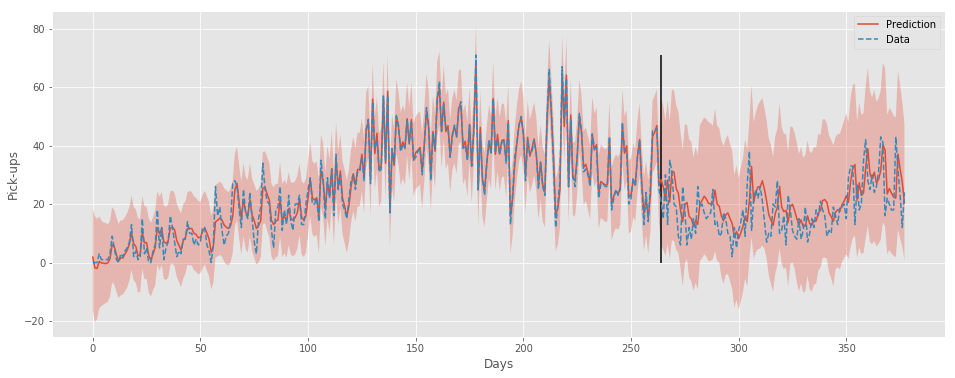

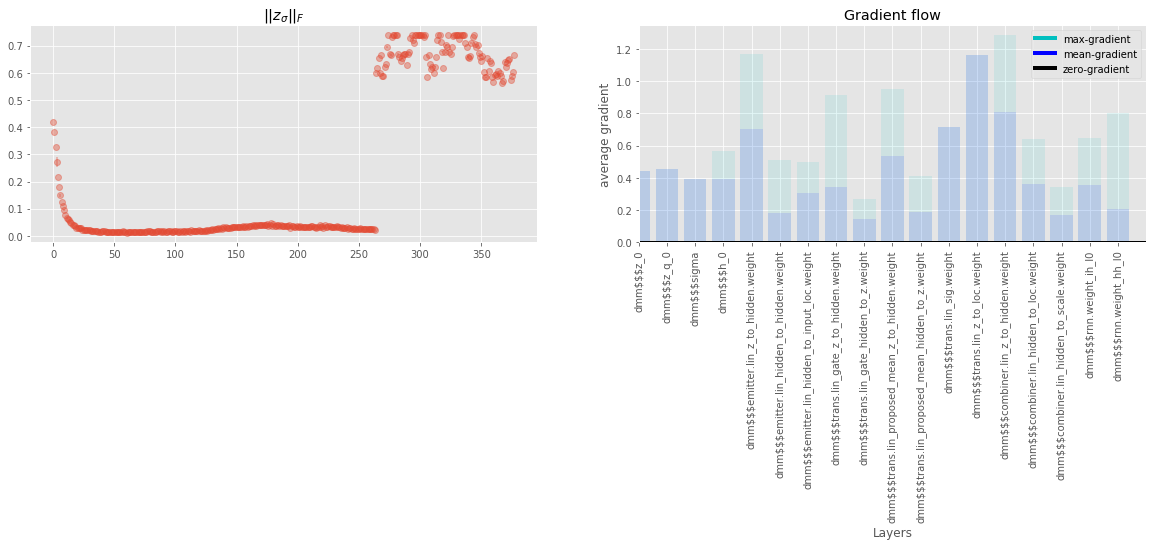

In [106]:
# define initial hidden state
h_0_contig = dmm.h_0.expand(1, 1, dmm.rnn.hidden_size).contiguous()

# define num_latent samples
num_latent_samples = 10000

# Expand z_prev to have dimensions (num_latent_samples, latent_size)
z_prev = dmm.z_0.expand(num_latent_samples, dmm.z_0.size(0))

# book-keeping
z_samples = []
z_scales = [[], []]
y_samples = []
y_mean = []
y_025 = []
y_975 = []

# Train Predictions
rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :T, :].float(), h_0_contig)

# reverse rnn_output to get initial ordering
#             rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

for t in range(T):
    # compute mean and variance of z_t
    z_loc, z_scale = dmm.combiner(z_prev, rnn_output[:, t, :])
    z_scales[0].append(z_scale.norm(dim=1).mean().item())
    z_scales[1].append(z_scale.norm(dim=1).std().item())
    # sample from z_t distribution
    z_t = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
    if t != T-1:
        z_samples.append(z_t)

    # compute mean of y_t
    y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

    # sample from y_t distribution
    y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
    y_samples.append(y_t)

    # store z_t for next computation
    if t != T-1:
        z_prev = z_samples[-1]

    # store predictions and CI
    y_mean.append(np.mean(y_t, axis=0))
    y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
    y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

# Test Predictions
for t in range(T, T + T_pred):
    rnn_output, rnn_hidden_state = dmm.rnn(y_sc[:, :t, :].float(), h_0_contig)

    # reverse rnn_output to get initial ordering
#                 rnn_output = torch.flip(rnn_output[:, :, :], dims=[1])

    rnn_output = rnn_output.expand(num_latent_samples, rnn_output.size(1), rnn_output.size(2))

    # compute mean and variance of z_t_1
    z_loc, z_scale = dmm.combiner(z_samples[-1], rnn_output[:, -1, :])

    # sample from z_t_1 distribution
    z_t_1 = dist.Normal(loc=z_loc, scale=z_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)
    z_samples.append(z_t_1)

    # run transition network forward
    z_t_loc, z_t_scale = dmm.trans(z_t_1)
    z_scales[0].append(z_t_scale.norm(dim=1).mean().item())
    z_scales[1].append(z_t_scale.norm(dim=1).std().item())
    z_t = dist.Normal(loc=z_t_loc, scale=z_t_scale).to_event(1).sample(sample_shape=[1]).reshape(z_prev.shape)

    # compute mean of y_t
    y_loc = dmm.emitter(z_t).view(num_latent_samples, y_sc.size(2))

    # sample from y_t distribution
    y_t = dist.Normal(loc=y_loc, scale=dmm.sigma).to_event(1).sample(sample_shape=[1]).view(num_latent_samples, y_sc.size(2)).detach().numpy()
    y_samples.append(y_t)

    # store predictions and CI
    y_mean.append(np.mean(y_t, axis=0))
    y_025.append(np.quantile(a=y_t, q=0.025, axis=0))
    y_975.append(np.quantile(a=y_t, q=0.975, axis=0))

# compute predictions
y_pred = scaler.inverse_transform(np.array(y_mean))
y_025 = scaler.inverse_transform(np.array(y_025))
y_975 = scaler.inverse_transform(np.array(y_975))



for hub in range(y_sc.shape[2]):
    print("\n SUPER-HUB ", hub+1)
    print("\n==== Train Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                           mean_absolute_error(y_train[ :, hub].reshape(-1,1), y_pred[:T, hub]), 
                                                           np.sqrt(mean_squared_error(y_train[:, hub].reshape(-1,1), y_pred[:T, hub]))))
    print("==== Validation Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                           mean_absolute_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]), 
                                                           np.sqrt(mean_squared_error(y_val[:, hub].reshape(-1,1), y_pred[T:T+T_val, hub]))))
    print("==== Test Results ====")
    print("R2: {0:.3f}, MAE: {1:.3f}, RMSE: {2:.3f}".format(r2_score(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                           mean_absolute_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]), 
                                                           np.sqrt(mean_squared_error(y_test[:, hub].reshape(-1,1), y_pred[T+T_val:T+T_val+T_test, hub]))))
    plt.figure(figsize=(16, 6))
    plt.plot(y_pred[:,hub], label="Prediction")
    plt.fill_between(np.arange(len(y_025[:,hub])), y_025[:,hub], y_975[:,hub], alpha=0.3)
    plt.vlines(T, ymin=y.min(),ymax=y.max())
    plt.plot(np.arange(T+T_pred), y.flatten(), label="Data", linestyle="--")
    plt.xlabel("Days")
    plt.ylabel("Pick-ups")
    plt.legend()
    plt.show()

# Plot train statistics
fig = plt.figure(figsize=(20,4))
fig.add_subplot(121)
plt.errorbar(np.arange(len(z_scales[0])), z_scales[0], np.array(z_scales[1]), fmt='o', alpha=0.4, errorevery=3)
plt.title(r"$||z_{\sigma}||_F$")
fig.add_subplot(122)
plot_grad_flow(pyro.get_param_store().named_parameters())